# 1. Introducción

El presente análisis tiene como objetivo utilizar técnicas de ciencia de datos para mejorar la gestión comercial y logística de la empresa. A través de la aplicación de modelos estadísticos y de machine learning, se buscará:

- Predecir la demanda de productos con base en datos históricos de ventas.
- Segmentar a los clientes para entender su comportamiento y personalizar estrategias de venta.
- Optimizar la gestión de inventarios y logística para una distribución eficiente.

Los datos provienen de registros de ventas y movimientos de inventario entre el año 2023, 2024 y 2025. Este análisis servirá de base para la construcción de tableros de visualización interactiva en Power BI.

# 2. Carga y Preparación de Datos

## 2.1. Carga de Datos

In [1]:
import pandas as pd

In [2]:
ventas_df = pd.read_csv("ventas.csv")

In [3]:
ventas_df.shape

(950, 9)

In [4]:
ventas_totales_por_producto = ventas_df.groupby('NOMBRE PRODUCTO')['CANT'].sum().sort_values(ascending=False)
print(ventas_totales_por_producto)

NOMBRE PRODUCTO
COMPLETO      29849
INFANTIL      10624
COCA           6417
CHUPETE        5816
MASTICABLE     3104
EUCALIPTO       777
WIRA WIRA       594
GENGIBRE        425
MIEL            341
Name: CANT, dtype: int64


In [5]:
ventas_dinero_por_producto = ventas_df.groupby('NOMBRE PRODUCTO')['TOTAL'].sum().sort_values(ascending=False)
print(ventas_dinero_por_producto)

NOMBRE PRODUCTO
COMPLETO      1494505.0
INFANTIL       532924.0
COCA           316259.0
CHUPETE        297082.0
MASTICABLE     164064.2
EUCALIPTO       38410.0
WIRA WIRA       29310.0
GENGIBRE        19165.0
MIEL            16832.0
Name: TOTAL, dtype: float64


## 2.2. Limpieza de Datos

In [6]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FECHA            950 non-null    object 
 1   NOMBRE CLIENTE   950 non-null    object 
 2   CANT             950 non-null    int64  
 3   NOMBRE PRODUCTO  950 non-null    object 
 4   MEDIDA           950 non-null    object 
 5   PRECIO UNITARIO  950 non-null    float64
 6   TOTAL            950 non-null    float64
 7   NOTA             950 non-null    int64  
 8   CIUDAD           950 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 66.9+ KB


In [7]:
ventas_df.isnull().sum()

FECHA              0
NOMBRE CLIENTE     0
CANT               0
NOMBRE PRODUCTO    0
MEDIDA             0
PRECIO UNITARIO    0
TOTAL              0
NOTA               0
CIUDAD             0
dtype: int64

In [8]:
def convertir_fecha(df, fecha):
    df[fecha] = pd.to_datetime(df[fecha])
    return df

In [9]:
ventas_df = convertir_fecha(ventas_df, 'FECHA')
ventas_df = ventas_df.drop(columns=['NOTA'])


In [10]:
ventas_df.head()


,FECHA,NOMBRE CLIENTE,CANT,NOMBRE PRODUCTO,MEDIDA,PRECIO UNITARIO,TOTAL,CIUDAD
0,2023-01-10,FRANKIE,40,INFANTIL,BOLSA 20 SOBRES,50.0,2000.0,COCHABAMBA
1,2023-01-10,FRANKIE,20,COMPLETO,BOLSA 20 SOBRES,50.0,1000.0,COCHABAMBA
2,2023-01-10,JHONNY BELTRAN,80,COMPLETO,BOLSA 20 SOBRES,48.0,3840.0,COCHABAMBA
3,2023-01-10,JHONNY BELTRAN,20,INFANTIL,BOLSA 20 SOBRES,48.0,960.0,COCHABAMBA
4,2023-01-10,JHONNY BELTRAN,60,COMPLETO,BOLSA 20 SOBRES,48.0,2880.0,COCHABAMBA


# 3. Análisis Exploratorio de Datos (EDA)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 3.1. Información General

In [13]:
print("VENTAS")
print(ventas_df.shape)
print(ventas_df.columns)
print(ventas_df.dtypes)
print(ventas_df.isnull().sum())


VENTAS
(950, 8)
Index(['FECHA', 'NOMBRE CLIENTE', 'CANT', 'NOMBRE PRODUCTO', 'MEDIDA',
       'PRECIO UNITARIO', 'TOTAL', 'CIUDAD'],
      dtype='object')
FECHA              datetime64[ns]
NOMBRE CLIENTE             object
CANT                        int64
NOMBRE PRODUCTO            object
MEDIDA                     object
PRECIO UNITARIO           float64
TOTAL                     float64
CIUDAD                     object
dtype: object
FECHA              0
NOMBRE CLIENTE     0
CANT               0
NOMBRE PRODUCTO    0
MEDIDA             0
PRECIO UNITARIO    0
TOTAL              0
CIUDAD             0
dtype: int64


## 3.2. Estadísticos Descriptivos

### 3.2.1. Estadísticos Descriptivos Ventas

In [14]:
print("Variables Cuantitativas")
print(ventas_df.describe())

Variables Cuantitativas
                               FECHA        CANT  PRECIO UNITARIO  \
count                            950  950.000000       950.000000   
mean   2024-01-08 19:08:58.105263360   60.996842        50.410000   
min              2023-01-10 00:00:00    1.000000        20.000000   
25%              2023-06-08 00:00:00   20.000000        48.000000   
50%              2023-12-18 00:00:00   30.000000        50.000000   
75%              2024-06-29 00:00:00   80.000000        50.000000   
max              2025-03-14 00:00:00  400.000000       114.000000   
std                              NaN   75.372395         7.393541   

              TOTAL  
count    950.000000  
mean    3061.632842  
min       47.000000  
25%      940.000000  
50%     1647.500000  
75%     3760.000000  
max    33000.000000  
std     3897.890066  


In [15]:
print("Variables Categóricas")
print(ventas_df.describe(include='object'))

Variables Categóricas
        NOMBRE CLIENTE NOMBRE PRODUCTO           MEDIDA      CIUDAD
count              950             950              950         950
unique              64               9                8           9
top     JHONNY BELTRAN        COMPLETO  BOLSA 20 SOBRES  COCHABAMBA
freq               187             352              742         668


## 3.3. Frecuencias de Variables Categóricas

In [16]:
print(ventas_df["NOMBRE CLIENTE"].value_counts().head(5))
print(ventas_df['CIUDAD'].value_counts().head(5))


NOMBRE CLIENTE
JHONNY BELTRAN    187
VICTOR FOREST      77
LEO CAMACHO        69
JUAN TORREZ        59
JOEL               52
Name: count, dtype: int64
CIUDAD
COCHABAMBA    668
LA PAZ        142
POTOSI         53
ORURO          27
VILLAZON       19
Name: count, dtype: int64


## 3.4. Análisis Gráfico

Creamos variables auxiliares para año, mes y día de la semana

In [17]:
ventas_df["AÑO"] = ventas_df["FECHA"].dt.year
ventas_df["MES"] = ventas_df["FECHA"].dt.month
ventas_df["DIA_SEMANA"] = ventas_df["FECHA"].dt.day_name()
ventas_df['DIA'] = ventas_df['FECHA'].dt.day

### 3.4.1. Predicción de Demanda

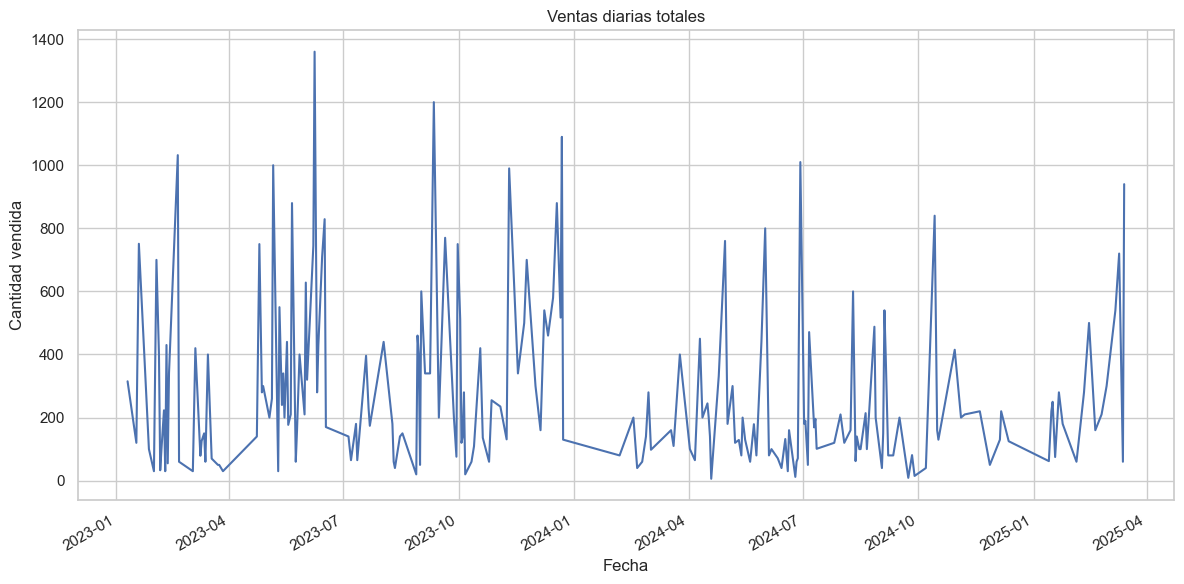

In [18]:
ventas_tiempo = ventas_df.groupby("FECHA")["CANT"].sum()

plt.figure(figsize=(12,6))
ventas_tiempo.plot()
plt.title("Ventas diarias totales")
plt.ylabel("Cantidad vendida")
plt.xlabel("Fecha")
plt.grid(True)
plt.tight_layout()
plt.show()

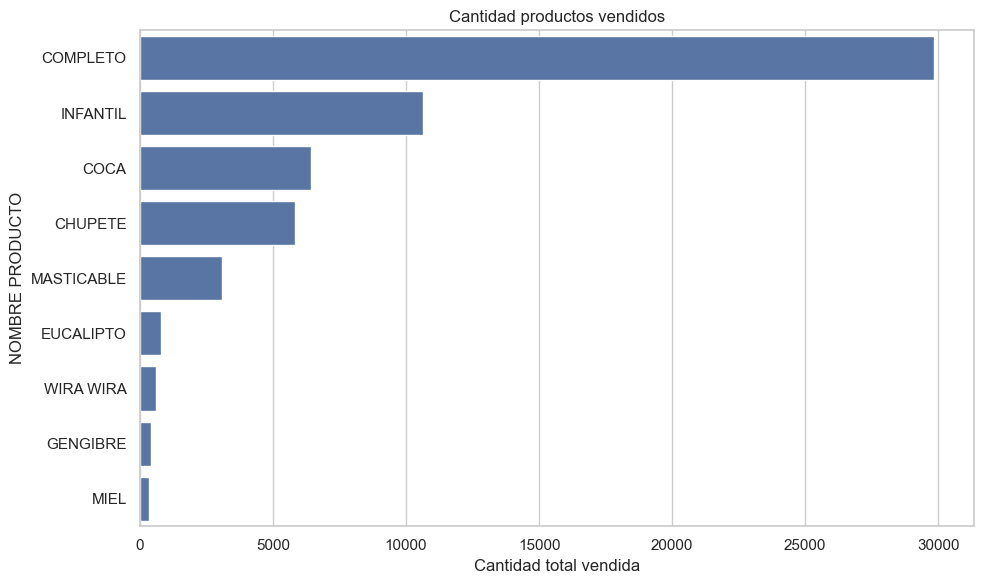

In [19]:
top_productos = ventas_df.groupby("NOMBRE PRODUCTO")["CANT"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_productos.values, y=top_productos.index)
plt.title("Cantidad productos vendidos")
plt.xlabel("Cantidad total vendida")
plt.tight_layout()
plt.show()

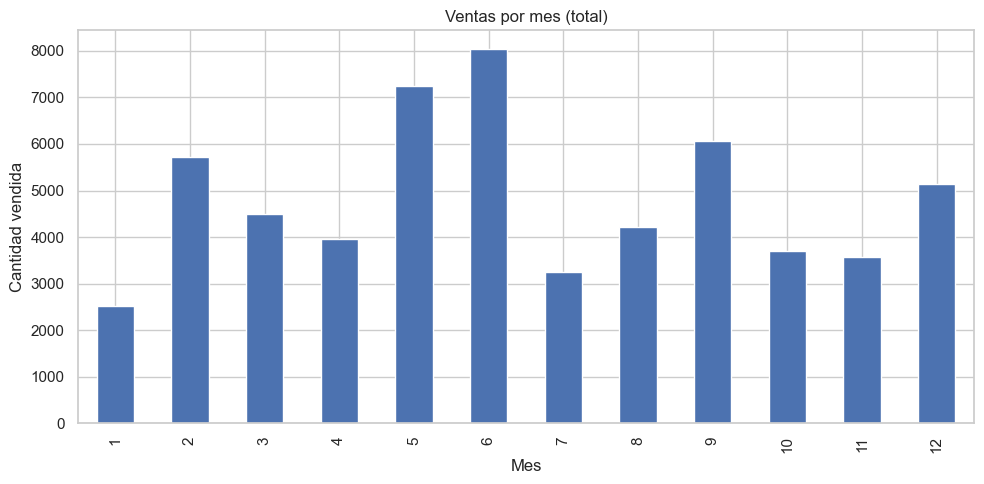

In [20]:
ventas_mes = ventas_df.groupby("MES")["CANT"].sum()

plt.figure(figsize=(10,5))
ventas_mes.plot(kind="bar")
plt.title("Ventas por mes (total)")
plt.xlabel("Mes")
plt.ylabel("Cantidad vendida")
plt.tight_layout()
plt.show()

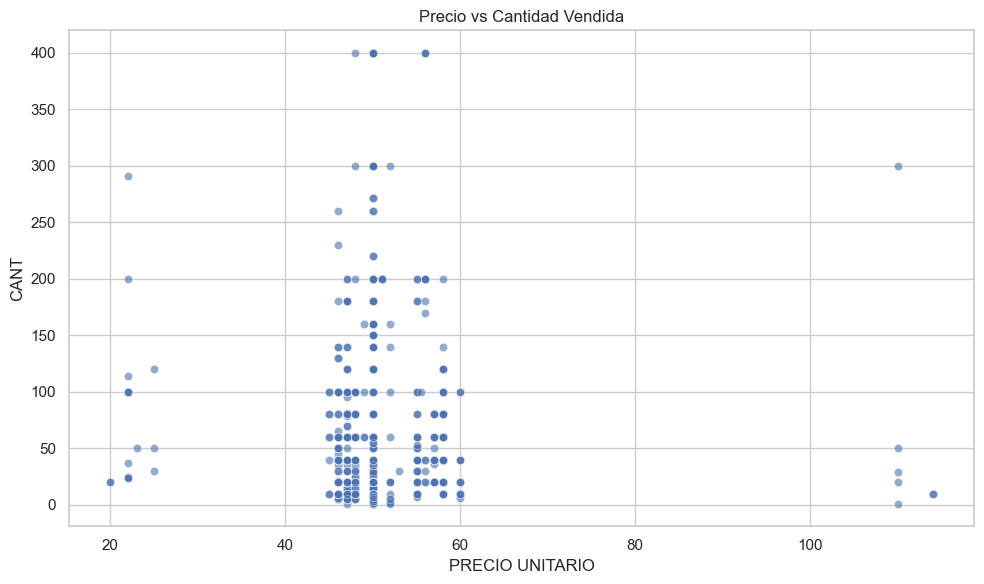

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=ventas_df, x="PRECIO UNITARIO", y="CANT", alpha=0.6)
plt.title("Precio vs Cantidad Vendida")
plt.tight_layout()
plt.show()

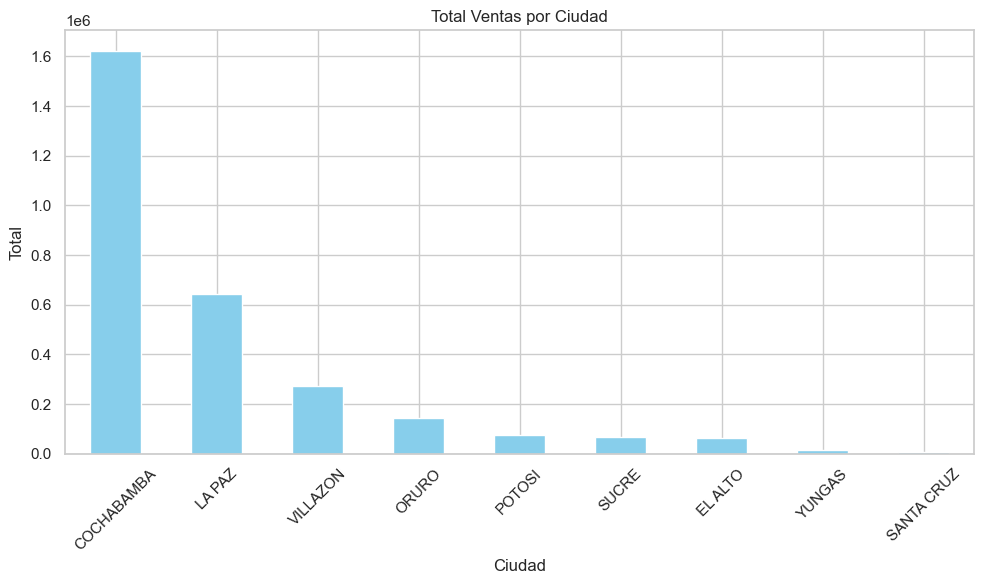

In [22]:
ventas_ciudad = ventas_df.groupby("CIUDAD")["TOTAL"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ventas_ciudad.plot(kind='bar', color='skyblue')
plt.title("Total Ventas por Ciudad")
plt.ylabel("Total")
plt.xlabel("Ciudad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

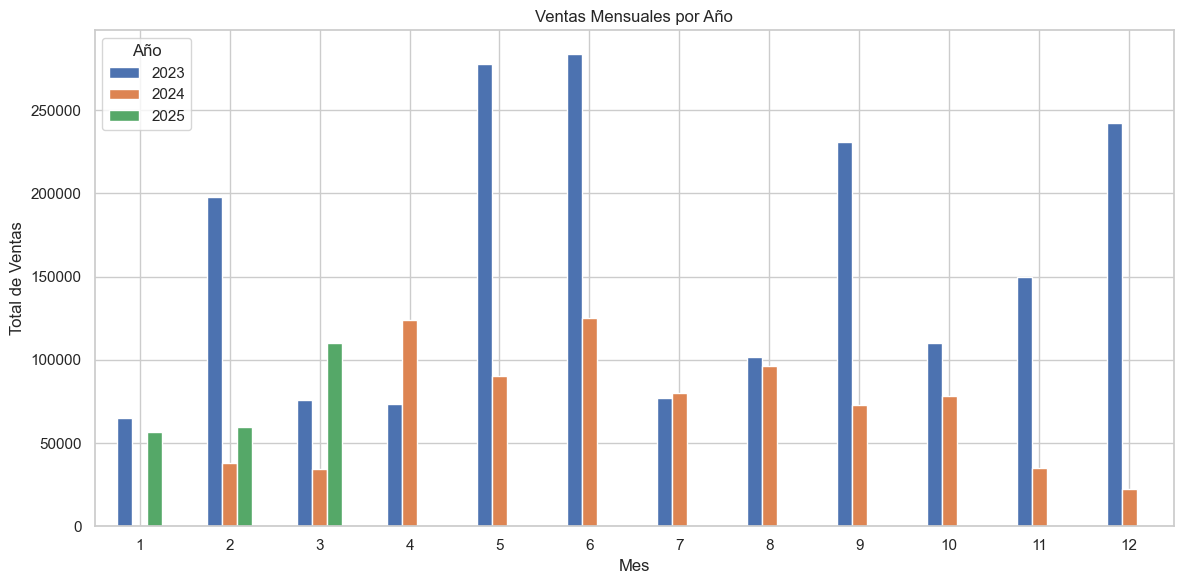

In [23]:
ventas_mes = ventas_df.groupby(["AÑO", "MES"])["TOTAL"].sum().unstack().fillna(0)

ventas_mes.T.plot(kind="bar", figsize=(12, 6))
plt.title("Ventas Mensuales por Año")
plt.ylabel("Total de Ventas")
plt.xlabel("Mes")
plt.xticks(rotation=0)
plt.legend(title="Año")
plt.tight_layout()
plt.show()

### 3.4.2. Segmentación de Clientes

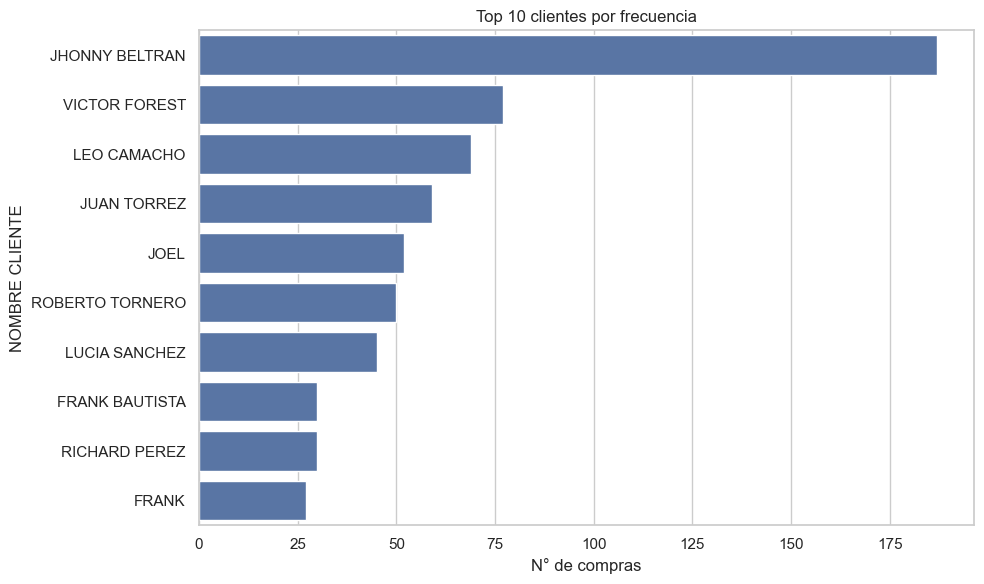

In [24]:
clientes_frecuentes = ventas_df["NOMBRE CLIENTE"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=clientes_frecuentes.values, y=clientes_frecuentes.index)
plt.title("Top 10 clientes por frecuencia")
plt.xlabel("N° de compras")
plt.tight_layout()
plt.show()

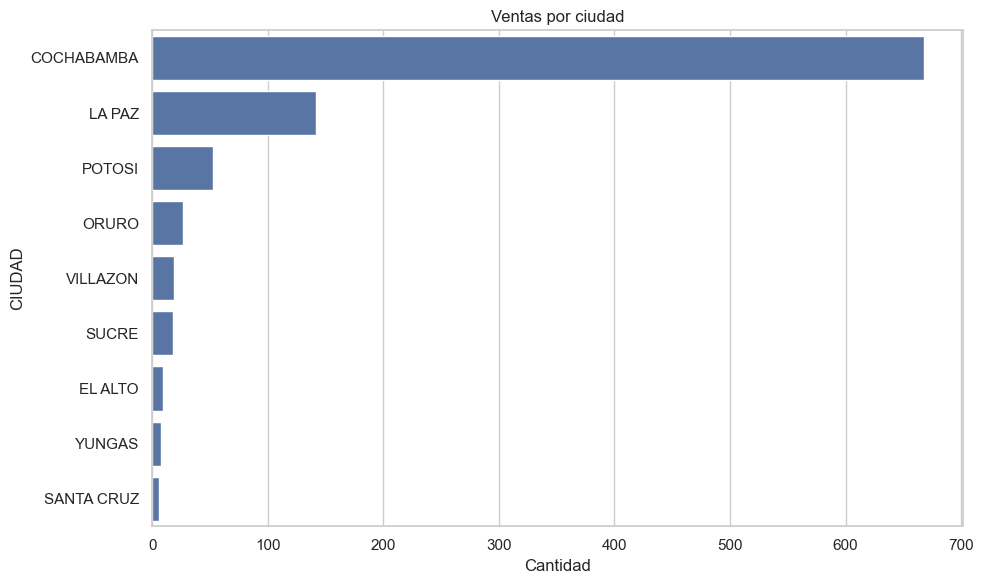

In [25]:
ciudades = ventas_df["CIUDAD"].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=ciudades.values, y=ciudades.index)
plt.title("Ventas por ciudad")
plt.xlabel("Cantidad")
plt.tight_layout()
plt.show()

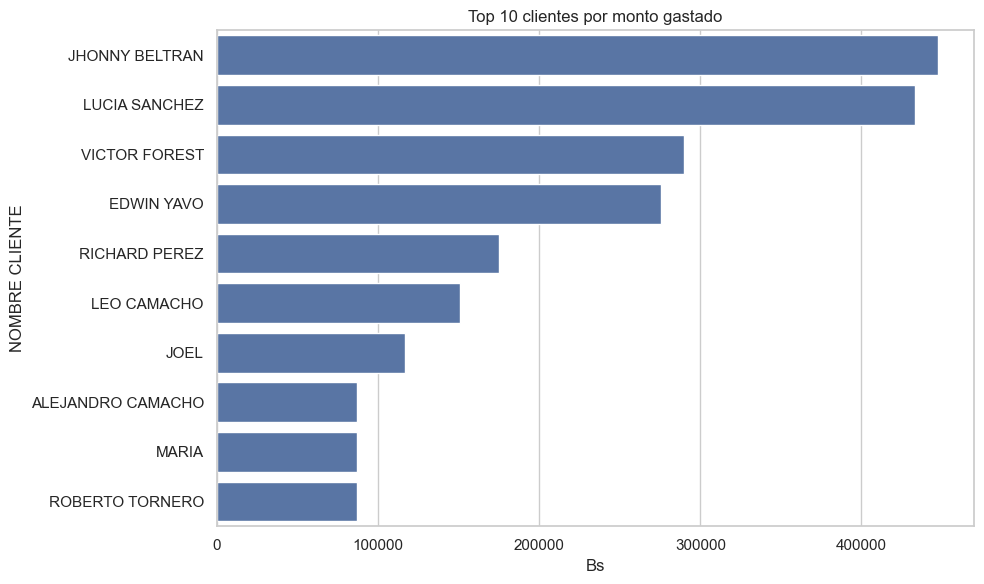

In [26]:
top_gastos = ventas_df.groupby("NOMBRE CLIENTE")["TOTAL"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_gastos.values, y=top_gastos.index)
plt.title("Top 10 clientes por monto gastado")
plt.xlabel("Bs")
plt.tight_layout()
plt.show()

### 3.4.3. Optimización de Inventarios

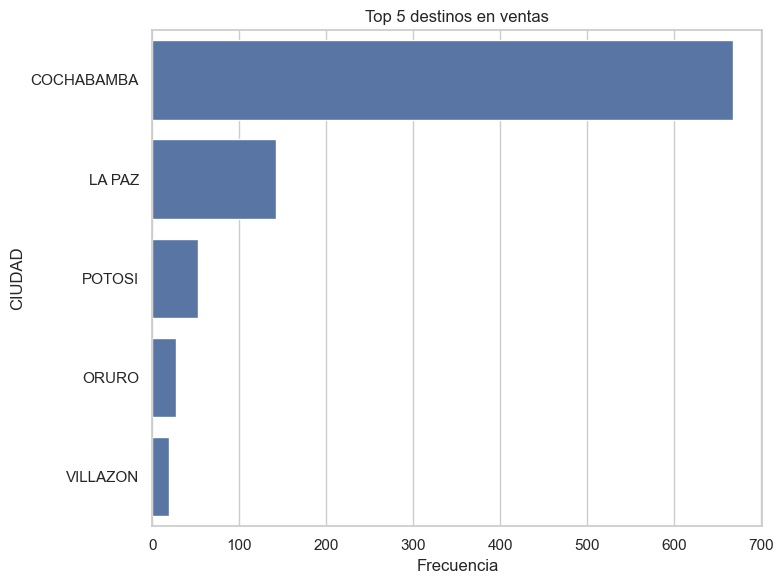

In [27]:
destinos = ventas_df["CIUDAD"].value_counts().head(5)

plt.figure(figsize=(8,6))
sns.barplot(x=destinos.values, y=destinos.index)
plt.title("Top 5 destinos en ventas")
plt.xlabel("Frecuencia")
plt.tight_layout()
plt.show()

### 3.4.4. Correlacion de Ventas

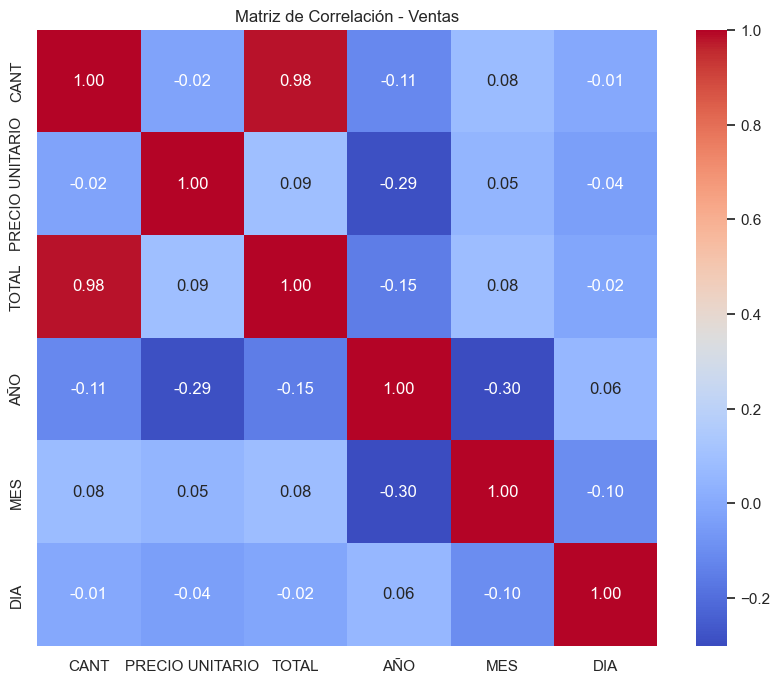

In [28]:
numericas_ventas = ventas_df.select_dtypes(include='number')

correlacion_ventas = numericas_ventas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_ventas, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Ventas")
plt.show()


## 3.5. Conclusiones

1. **Demanda de productos:**

- Se identificaron productos con alta rotación mensual, lo cual es clave para focalizar la predicción de demanda.

- Algunos productos tienen un precio estable, mientras que otros muestran variaciones significativas.

2. **Comportamiento de los clientes:**

- La segmentación por ciudad revela que la mayor parte de las ventas proviene de clientes de COCHABAMBA y POTOSI, lo cual puede guiar la personalización de estrategias comerciales.

- Hay clientes frecuentes que concentran una gran parte del volumen de ventas, lo cual sugiere que podrían beneficiarse de estrategias de fidelización.

3. **Gestión de inventarios:**

- Las correlaciones indican que a mayor ingreso de paquetes, también aumenta el saldo final en almacén, lo que refleja una adecuada reposición.


# 4. Predicción de Demanda

### Preparación de los Datos

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
ventas_df_demanda = ventas_df.drop(columns=['TOTAL'])
ventas_df_demanda.columns

Index(['FECHA', 'NOMBRE CLIENTE', 'CANT', 'NOMBRE PRODUCTO', 'MEDIDA',
       'PRECIO UNITARIO', 'CIUDAD', 'AÑO', 'MES', 'DIA_SEMANA', 'DIA'],
      dtype='object')

In [31]:
ventas_df_demanda['NOMBRE PRODUCTO'].unique()

array(['INFANTIL', 'COMPLETO', 'CHUPETE', 'MASTICABLE', 'MIEL',
       'EUCALIPTO', 'WIRA WIRA', 'COCA', 'GENGIBRE'], dtype=object)

In [32]:
ventas_df_demanda['NOMBRE PRODUCTO'].value_counts()

NOMBRE PRODUCTO
COMPLETO      352
INFANTIL      231
CHUPETE       126
MASTICABLE     89
EUCALIPTO      40
COCA           37
WIRA WIRA      32
MIEL           23
GENGIBRE       20
Name: count, dtype: int64

In [33]:
producto_objetivo = 'COMPLETO' #Reemplazar con el producto elegido a predecir

In [34]:
ventas_producto = ventas_df_demanda[ventas_df['NOMBRE PRODUCTO'] == producto_objetivo].copy()

In [35]:
ventas_producto

,FECHA,NOMBRE CLIENTE,CANT,NOMBRE PRODUCTO,MEDIDA,PRECIO UNITARIO,CIUDAD,AÑO,MES,DIA_SEMANA,DIA
1,2023-01-10,FRANKIE,20,COMPLETO,BOLSA 20 SOBRES,50.0,COCHABAMBA,2023,1,Tuesday,10
2,2023-01-10,JHONNY BELTRAN,80,COMPLETO,BOLSA 20 SOBRES,48.0,COCHABAMBA,2023,1,Tuesday,10
4,2023-01-10,JHONNY BELTRAN,60,COMPLETO,BOLSA 20 SOBRES,48.0,COCHABAMBA,2023,1,Tuesday,10
5,2023-01-10,JHONNY BELTRAN,20,COMPLETO,BOLSA 20 SOBRES,48.0,COCHABAMBA,2023,1,Tuesday,10
8,2023-01-10,MARIO FUENTES,10,COMPLETO,BOLSA 20 SOBRES,50.0,COCHABAMBA,2023,1,Tuesday,10
...,...,...,...,...,...,...,...,...,...,...,...
930,2025-03-07,LUIS GEMIO,40,COMPLETO,BOLSA 20 SOBRES,50.0,LA PAZ,2025,3,Friday,7
934,2025-03-10,LUCIA SANCHEZ,400,COMPLETO,BOLSA 20 SOBRES,50.0,LA PAZ,2025,3,Monday,10
938,2025-03-13,ROBERTO TORNERO,40,COMPLETO,BOLSA 20 SOBRES,55.0,LA PAZ,2025,3,Thursday,13
940,2025-03-14,LUIS FOREST,200,COMPLETO,BOLSA 20 SOBRES,47.0,SUCRE,2025,3,Friday,14


División del Dataset en 80-20

### 4.1. Prophet

In [36]:
ventas_producto_prophet = ventas_producto.groupby('FECHA').agg({'CANT': 'sum'}).reset_index()
ventas_producto_prophet.rename(columns={'FECHA': 'ds', 'CANT': 'y'}, inplace=True)
ventas_producto_prophet = ventas_producto_prophet.sort_values('ds').reset_index(drop=True)

In [37]:
ventas_producto_prophet = ventas_producto_prophet.set_index('ds').resample('W').sum().reset_index()

In [38]:
n = len(ventas_producto_prophet)
train_size = int(n * 0.8)

train_prophet = ventas_producto_prophet.iloc[:train_size]
test_prophet = ventas_producto_prophet.iloc[train_size:]

print(f"Entrenamiento: {len(train_prophet)} - Prueba: {len(test_prophet)}")

Entrenamiento: 91 - Prueba: 23


In [39]:
from prophet import Prophet
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [40]:
model = Prophet(changepoint_prior_scale=0.1)
model.fit(train_prophet)

19:27:37 - cmdstanpy - INFO - Chain [1] start processing
19:27:37 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
periodos_test = len(test_prophet)
future = model.make_future_dataframe(periods=periodos_test, freq='W')

forecast = model.predict(future)

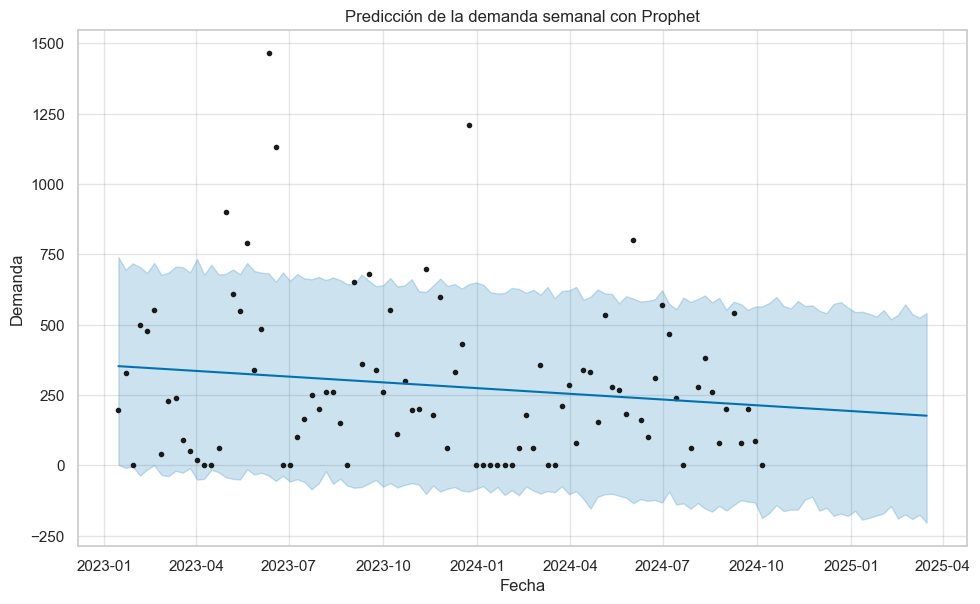

In [42]:
fig = model.plot(forecast)
plt.title("Predicción de la demanda semanal con Prophet")
plt.xlabel("Fecha")
plt.ylabel("Demanda")
plt.grid(True)
plt.show()

In [43]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [44]:
cv_results = cross_validation(
    model,
    initial='441 days',  # Aproximadamente 63 semanas (441 días)
    period='7 days',
    horizon='7 days'
)

metrics = performance_metrics(cv_results)
print(metrics)

  0%|          | 0/27 [00:00<?, ?it/s]

19:27:38 - cmdstanpy - INFO - Chain [1] start processing
19:27:38 - cmdstanpy - INFO - Chain [1] done processing
19:27:38 - cmdstanpy - INFO - Chain [1] start processing
19:27:38 - cmdstanpy - INFO - Chain [1] done processing
19:27:38 - cmdstanpy - INFO - Chain [1] start processing
19:27:38 - cmdstanpy - INFO - Chain [1] done processing
19:27:38 - cmdstanpy - INFO - Chain [1] start processing
19:27:38 - cmdstanpy - INFO - Chain [1] done processing
19:27:38 - cmdstanpy - INFO - Chain [1] start processing
19:27:38 - cmdstanpy - INFO - Chain [1] done processing
19:27:38 - cmdstanpy - INFO - Chain [1] start processing
19:27:38 - cmdstanpy - INFO - Chain [1] done processing
19:27:39 - cmdstanpy - INFO - Chain [1] start processing
19:27:39 - cmdstanpy - INFO - Chain [1] done processing
19:27:39 - cmdstanpy - INFO - Chain [1] start processing
19:27:39 - cmdstanpy - INFO - Chain [1] done processing
19:27:39 - cmdstanpy - INFO - Chain [1] start processing
19:27:39 - cmdstanpy - INFO - Chain [1]

  horizon           mse        rmse         mae     mdape     smape  coverage
0  7 days  38755.732362  196.864757  152.119877  0.457122  0.661695  0.962963


### 4.2. ARIMA

In [45]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

#### 4.2.1. Preparación de Datos para ARIMA

In [46]:
ventas_producto_arima = ventas_producto.copy()
ventas_producto_arima.rename(columns={'ds': 'FECHA', 'y': 'CANT'}, inplace=True)
ventas_producto_arima['FECHA'] = pd.to_datetime(ventas_producto_arima['FECHA'])
ventas_producto_arima.set_index('FECHA', inplace=True)

In [47]:
ventas_producto_semanal = ventas_producto_arima.resample('W').sum()
ventas_producto_semanal

,NOMBRE CLIENTE,CANT,NOMBRE PRODUCTO,MEDIDA,PRECIO UNITARIO,CIUDAD,AÑO,MES,DIA_SEMANA,DIA
FECHA,,,,,,,,,,
2023-01-15,FRANKIEJHONNY BELTRANJHONNY BELTRANJHONNY BELT...,195,COMPLETOCOMPLETOCOMPLETOCOMPLETOCOMPLETOCOMPLETO,BOLSA 20 SOBRESBOLSA 20 SOBRESBOLSA 20 SOBRESB...,294.0,COCHABAMBACOCHABAMBACOCHABAMBACOCHABAMBACOCHAB...,12138,6,TuesdayTuesdayTuesdayTuesdayTuesdayTuesday,60
2023-01-22,VICTOR FORESTJHONNY BELTRANROBERTO TORNEROJUAN...,328,COMPLETOCOMPLETOCOMPLETOCOMPLETOCOMPLETO,BOLSA 20 SOBRESBOLSA 20 SOBRESBOLSA 20 SOBRESB...,251.0,COCHABAMBACOCHABAMBACOCHABAMBACOCHABAMBACOCHAB...,10115,5,TuesdayThursdayThursdayThursdayThursday,93
2023-01-29,0,0,0,0,0.0,0,0,0,0,0
2023-02-05,LUCIA SANCHEZMONICA ZEPITAMARIO FUENTESMARIO F...,500,COMPLETOCOMPLETOCOMPLETOCOMPLETOCOMPLETO,BOLSA 20 SOBRESBOLSA 20 SOBRESBOLSA 20 SOBRESB...,261.0,LA PAZORUROCOCHABAMBACOCHABAMBACOCHABAMBA,10115,10,ThursdayThursdaySundaySundaySunday,19
2023-02-12,MARIO FUENTESMARCIA VERAMARIO FUENTESJHONNY BE...,477,COMPLETOCOMPLETOCOMPLETOCOMPLETOCOMPLETO,BOLSA 20 SOBRESBOLSA 20 SOBRESBOLSA 20 SOBRESB...,260.0,COCHABAMBACOCHABAMBACOCHABAMBACOCHABAMBACOCHAB...,10115,10,WednesdayWednesdayThursdayFridaySaturday,46
...,...,...,...,...,...,...,...,...,...,...
2025-02-16,VICTOR FORESTLUCIA SANCHESLUCIA SANCHES,440,COMPLETOCOMPLETOCOMPLETO,BOLSA 20 SOBRESBOLSA 20 SOBRESBOLSA 20 SOBRES,91.0,COCHABAMBACOCHABAMBACOCHABAMBA,6075,6,MondayFridayFriday,38
2025-02-23,JHONNY BELTRANROBERTO TORNERO,140,COMPLETOCOMPLETO,BOLSA 20 SOBRESBOLSA 20 SOBRES,102.0,COCHABAMBALA PAZ,4050,4,WednesdayWednesday,38
2025-03-02,JHONNY BELTRANFRANKLEO CAMACHOJOEL,355,COMPLETOCOMPLETOCOMPLETOCOMPLETO,BOLSA 20 SOBRESBOLSA 20 SOBRESBOLSA 20 SOBRESB...,191.0,COCHABAMBACOCHABAMBACOCHABAMBACOCHABAMBA,8100,8,MondayMondayFridayFriday,104


In [48]:
n = len(ventas_producto_semanal)
train_size = int(n * 0.8)

train = ventas_producto_semanal.iloc[:train_size]
test = ventas_producto_semanal.iloc[train_size:]

print(f"Entrenamiento: {len(train)} - Prueba: {len(test)}")

Entrenamiento: 91 - Prueba: 23


#### 4.2.2. Identificación de Parámetros p, d y q

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

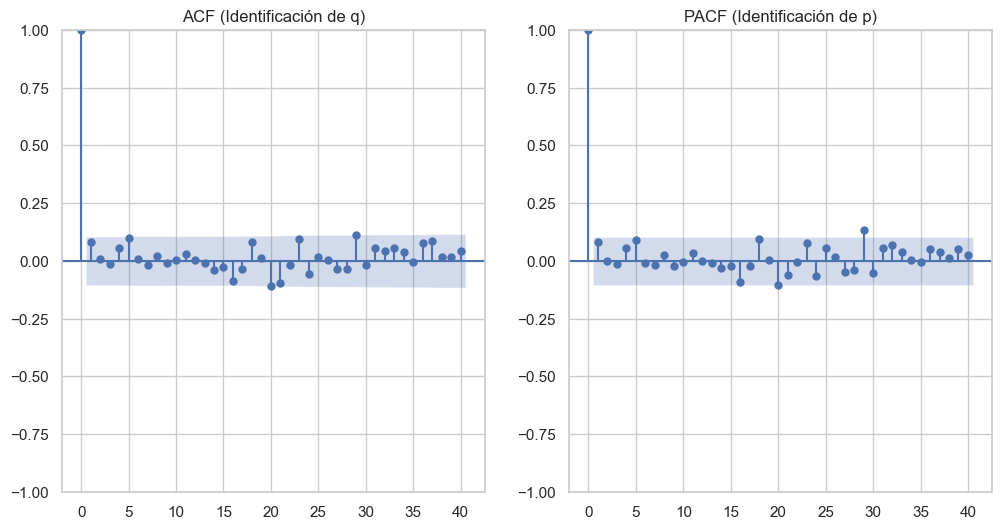

In [50]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plot_acf(ventas_producto_arima['CANT'], lags=40, ax=plt.gca())
plt.title('ACF (Identificación de q)')

plt.subplot(122)
plot_pacf(ventas_producto_arima['CANT'], lags=40, ax=plt.gca())
plt.title('PACF (Identificación de p)')

plt.show()

#### 4.2.3. Ajuste del modelo ARIMA

In [51]:
from statsmodels.tsa.arima.model import ARIMA

In [52]:
p, d, q = 1, 1, 1

modelo_arima = ARIMA(train['CANT'], order=(p,d,q))

resultado_arima = modelo_arima.fit()

modelo_arima_fit = modelo_arima.fit()

print(resultado_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                   CANT   No. Observations:                   91
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -635.039
Date:                Sun, 04 May 2025   AIC                           1276.079
Time:                        19:27:43   BIC                           1283.578
Sample:                    01-15-2023   HQIC                          1279.103
                         - 10-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2909      0.091      3.207      0.001       0.113       0.469
ma.L1         -0.9999     11.356     -0.088      0.930     -23.257      21.257
sigma2      7.545e+04   8.55e+05      0.088      0.9

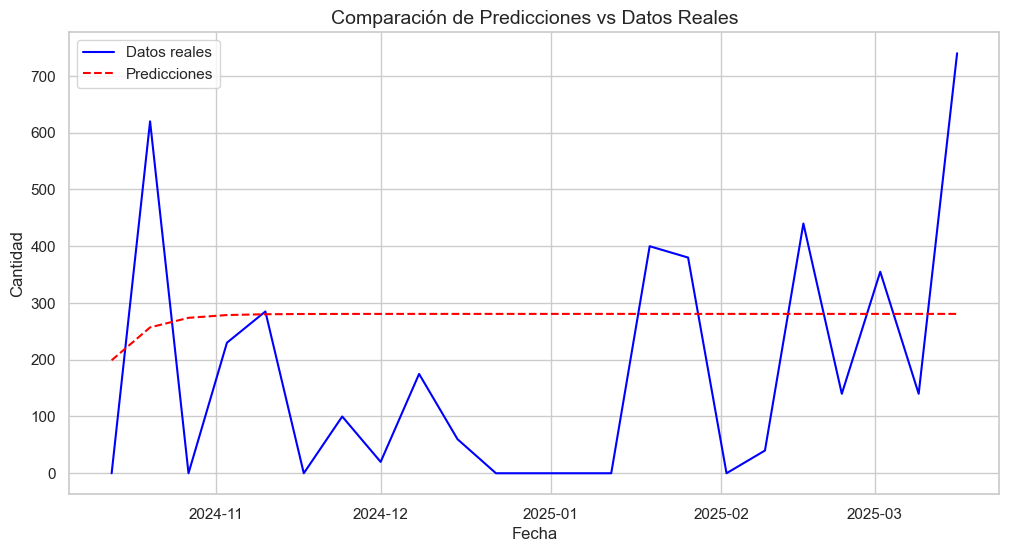

In [53]:
predicciones = resultado_arima.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(test.index, test['CANT'], label='Datos reales', color='blue')
plt.plot(test.index, predicciones, label='Predicciones', color='red', linestyle='--')

plt.title('Comparación de Predicciones vs Datos Reales', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

plt.legend()

plt.show()

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [55]:
predicciones_arima = modelo_arima_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

mae = mean_absolute_error(test['CANT'], predicciones_arima)
rmse = np.sqrt(mean_squared_error(test['CANT'], predicciones_arima))
mape = mean_absolute_percentage_error(test['CANT'], predicciones_arima)
r2 = 1 - (np.sum((test['CANT'] - predicciones_arima) ** 2) / np.sum((test['CANT'] - np.mean(test['CANT'])) ** 2))


print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape * 100}%")
print(f"R²: {r2}")

MAE: 207.61995598503694
RMSE: 232.71613669591545
MAPE: 4.224071705348317e+19%
R²: -0.20259532324001106


c:\Users\nando\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


## 4.3. Regresión Lineal

In [56]:
ventas_rl = ventas_producto
ventas_rl

,FECHA,NOMBRE CLIENTE,CANT,NOMBRE PRODUCTO,MEDIDA,PRECIO UNITARIO,CIUDAD,AÑO,MES,DIA_SEMANA,DIA
1,2023-01-10,FRANKIE,20,COMPLETO,BOLSA 20 SOBRES,50.0,COCHABAMBA,2023,1,Tuesday,10
2,2023-01-10,JHONNY BELTRAN,80,COMPLETO,BOLSA 20 SOBRES,48.0,COCHABAMBA,2023,1,Tuesday,10
4,2023-01-10,JHONNY BELTRAN,60,COMPLETO,BOLSA 20 SOBRES,48.0,COCHABAMBA,2023,1,Tuesday,10
5,2023-01-10,JHONNY BELTRAN,20,COMPLETO,BOLSA 20 SOBRES,48.0,COCHABAMBA,2023,1,Tuesday,10
8,2023-01-10,MARIO FUENTES,10,COMPLETO,BOLSA 20 SOBRES,50.0,COCHABAMBA,2023,1,Tuesday,10
...,...,...,...,...,...,...,...,...,...,...,...
930,2025-03-07,LUIS GEMIO,40,COMPLETO,BOLSA 20 SOBRES,50.0,LA PAZ,2025,3,Friday,7
934,2025-03-10,LUCIA SANCHEZ,400,COMPLETO,BOLSA 20 SOBRES,50.0,LA PAZ,2025,3,Monday,10
938,2025-03-13,ROBERTO TORNERO,40,COMPLETO,BOLSA 20 SOBRES,55.0,LA PAZ,2025,3,Thursday,13
940,2025-03-14,LUIS FOREST,200,COMPLETO,BOLSA 20 SOBRES,47.0,SUCRE,2025,3,Friday,14


In [57]:
ventas_rl = ventas_rl.drop(columns=['NOMBRE CLIENTE', 'NOMBRE PRODUCTO', 'MEDIDA', 'PRECIO UNITARIO'])
ventas_rl

,FECHA,CANT,CIUDAD,AÑO,MES,DIA_SEMANA,DIA
1,2023-01-10,20,COCHABAMBA,2023,1,Tuesday,10
2,2023-01-10,80,COCHABAMBA,2023,1,Tuesday,10
4,2023-01-10,60,COCHABAMBA,2023,1,Tuesday,10
5,2023-01-10,20,COCHABAMBA,2023,1,Tuesday,10
8,2023-01-10,10,COCHABAMBA,2023,1,Tuesday,10
...,...,...,...,...,...,...,...
930,2025-03-07,40,LA PAZ,2025,3,Friday,7
934,2025-03-10,400,LA PAZ,2025,3,Monday,10
938,2025-03-13,40,LA PAZ,2025,3,Thursday,13
940,2025-03-14,200,SUCRE,2025,3,Friday,14


In [58]:
ventas_rl['SEMANA'] = ventas_rl['FECHA'].dt.to_period('W').apply(lambda r: r.start_time)

In [59]:
ventas_rl_grouped = ventas_rl.groupby(['SEMANA']).agg({
    'CANT': 'sum',
    'AÑO': 'first',
    'MES': 'first',
    'DIA_SEMANA': 'first',
    'DIA': 'first'
}).reset_index()

In [60]:
ventas_rl_grouped

,SEMANA,CANT,AÑO,MES,DIA_SEMANA,DIA
0,2023-01-09,195,2023,1,Tuesday,10
1,2023-01-16,328,2023,1,Tuesday,17
2,2023-01-30,500,2023,2,Thursday,2
3,2023-02-06,477,2023,2,Wednesday,8
4,2023-02-13,552,2023,2,Sunday,19
...,...,...,...,...,...,...
85,2025-02-10,440,2025,2,Monday,10
86,2025-02-17,140,2025,2,Wednesday,19
87,2025-02-24,355,2025,2,Monday,24
88,2025-03-03,140,2025,3,Friday,7


In [61]:
df_dummies = pd.get_dummies(ventas_rl_grouped, columns=['DIA_SEMANA'], drop_first=True)

In [62]:
df_dummies.head()

,SEMANA,CANT,AÑO,MES,DIA,DIA_SEMANA_Monday,DIA_SEMANA_Saturday,DIA_SEMANA_Sunday,DIA_SEMANA_Thursday,DIA_SEMANA_Tuesday,DIA_SEMANA_Wednesday
0,2023-01-09,195,2023,1,10,False,False,False,False,True,False
1,2023-01-16,328,2023,1,17,False,False,False,False,True,False
2,2023-01-30,500,2023,2,2,False,False,False,True,False,False
3,2023-02-06,477,2023,2,8,False,False,False,False,False,True
4,2023-02-13,552,2023,2,19,False,False,True,False,False,False


In [63]:
X = df_dummies.drop(columns=['SEMANA', 'CANT'])
y = df_dummies['CANT']

### 4.3.2. División del dataset

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


### 4.3.3. Entrenamiento del Modelo de Regresión Lineal

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### 4.3.4. Evaluar el Modelo

In [67]:
y_pred = modelo.predict(X_test)  # Realizas las predicciones en los datos de test


In [68]:
y_pred

array([397.293049  , 350.10193879, 344.04636091, 399.50177191,
       387.39061614, 373.55120082, 287.82083116, 396.51999949,
       241.2698792 , 235.21430132, 200.87698907, 121.20219729,
       142.44273641, 210.00637242, 245.08632686, 197.89521666,
         6.65794332, 216.54050811])

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print(f"MAE (Regresión Lineal): {mae:.2f}")
print(f"RMSE (Regresión Lineal): {rmse:.2f}")
print(f"MAPE (Regresión Lineal): {mape:.2f}%")
print(f"R² (Regresión Lineal): {r2:.4f}")


MAE (Regresión Lineal): 205.95
RMSE (Regresión Lineal): 233.42
MAPE (Regresión Lineal): 223.26%
R² (Regresión Lineal): -0.3835


### 4.3.5. Visualización del Modelo

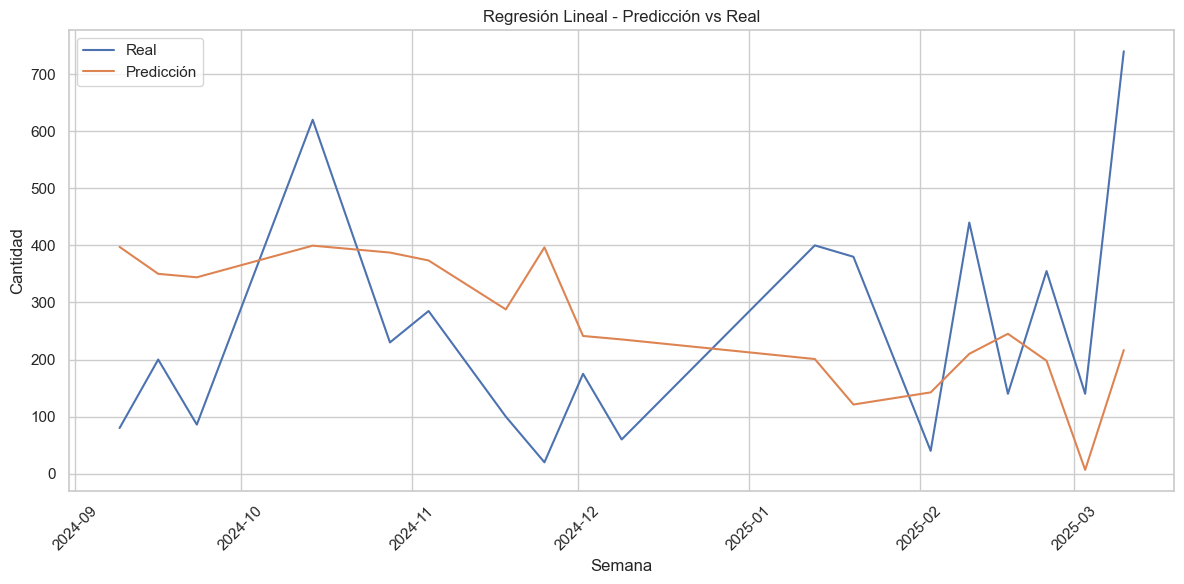

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(df_dummies['SEMANA'][-len(y_test):], y_test, label='Real')
plt.plot(df_dummies['SEMANA'][-len(y_test):], y_pred, label='Predicción')
plt.xlabel('Semana')
plt.ylabel('Cantidad')
plt.title('Regresión Lineal - Predicción vs Real')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4.4. Random Forest

### 4.4.1. Preparación de los Datos

In [71]:
ventas_rf = ventas_producto.copy()

ventas_rf['year'] = ventas_rf['FECHA'].dt.year
ventas_rf['month'] = ventas_rf['FECHA'].dt.month

In [72]:
ventas_rf

,FECHA,NOMBRE CLIENTE,CANT,NOMBRE PRODUCTO,MEDIDA,PRECIO UNITARIO,CIUDAD,AÑO,MES,DIA_SEMANA,DIA,year,month
1,2023-01-10,FRANKIE,20,COMPLETO,BOLSA 20 SOBRES,50.0,COCHABAMBA,2023,1,Tuesday,10,2023,1
2,2023-01-10,JHONNY BELTRAN,80,COMPLETO,BOLSA 20 SOBRES,48.0,COCHABAMBA,2023,1,Tuesday,10,2023,1
4,2023-01-10,JHONNY BELTRAN,60,COMPLETO,BOLSA 20 SOBRES,48.0,COCHABAMBA,2023,1,Tuesday,10,2023,1
5,2023-01-10,JHONNY BELTRAN,20,COMPLETO,BOLSA 20 SOBRES,48.0,COCHABAMBA,2023,1,Tuesday,10,2023,1
8,2023-01-10,MARIO FUENTES,10,COMPLETO,BOLSA 20 SOBRES,50.0,COCHABAMBA,2023,1,Tuesday,10,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2025-03-07,LUIS GEMIO,40,COMPLETO,BOLSA 20 SOBRES,50.0,LA PAZ,2025,3,Friday,7,2025,3
934,2025-03-10,LUCIA SANCHEZ,400,COMPLETO,BOLSA 20 SOBRES,50.0,LA PAZ,2025,3,Monday,10,2025,3
938,2025-03-13,ROBERTO TORNERO,40,COMPLETO,BOLSA 20 SOBRES,55.0,LA PAZ,2025,3,Thursday,13,2025,3
940,2025-03-14,LUIS FOREST,200,COMPLETO,BOLSA 20 SOBRES,47.0,SUCRE,2025,3,Friday,14,2025,3


In [73]:
ventas_rf['SEMANA'] = ventas_rf['FECHA'].dt.to_period('W').apply(lambda r: r.start_time)

ventas_semanales = ventas_rf.groupby('SEMANA').agg({'CANT': 'sum', 'PRECIO UNITARIO': 'mean', 'year': 'first', 'month': 'first'}).reset_index()

ventas_semanales.head()

,SEMANA,CANT,PRECIO UNITARIO,year,month
0,2023-01-09,195,49.0,2023,1
1,2023-01-16,328,50.2,2023,1
2,2023-01-30,500,52.2,2023,2
3,2023-02-06,477,52.0,2023,2
4,2023-02-13,552,55.0,2023,2


In [74]:
X = ventas_semanales[['year', 'month', 'PRECIO UNITARIO']] 
y = ventas_semanales['CANT']


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### 4.4.2. Entrenamiento del Modelo

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 4.4.3. Realizar Predicciones

In [78]:
rf_results = modelo_rf.predict(X_test)

In [79]:
rf_results

array([274.5       , 274.5       , 409.67      , 817.86      ,
       151.7       , 395.10333333, 320.33      , 422.06      ,
       424.3       , 286.91      , 259.5       , 377.5       ,
       252.54      , 258.5       , 285.25      , 314.59      ,
       213.82      , 258.73      ])

### 4.4.4. Visualización de Predicciones

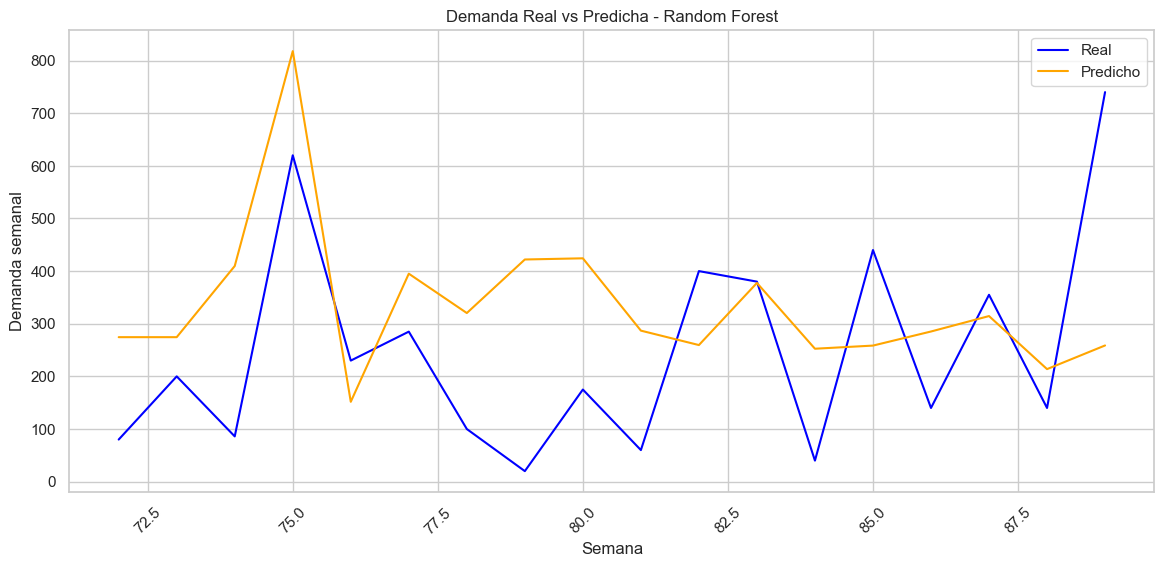

In [80]:
plt.figure(figsize=(14,6))

plt.plot(y_test.index, y_test, label='Real', color='blue')

plt.plot(y_test.index, rf_results, label='Predicho', color='orange')

plt.xlabel('Semana')
plt.ylabel('Demanda semanal')
plt.title('Demanda Real vs Predicha - Random Forest')

plt.legend()

plt.grid(True)
plt.xticks(rotation=45)

plt.show()

### 4.4.5. Métricas de Evaluación

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [82]:
y_pred = rf_results

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')


MSE: 49280.217256172844
RMSE: 221.9914801432092
MAE: 186.40685185185188
R²: -0.2513553830109212


## 4.5. Predicción Global con Random Forest

### 4.5.1. Preparación de los Datos

In [83]:
ventas_rf_g = ventas_df.copy()

In [84]:
ventas_rf_g.drop(columns=['MEDIDA'], inplace=True)

In [85]:
ventas_rf_g

,FECHA,NOMBRE CLIENTE,CANT,NOMBRE PRODUCTO,PRECIO UNITARIO,TOTAL,CIUDAD,AÑO,MES,DIA_SEMANA,DIA
0,2023-01-10,FRANKIE,40,INFANTIL,50.0,2000.0,COCHABAMBA,2023,1,Tuesday,10
1,2023-01-10,FRANKIE,20,COMPLETO,50.0,1000.0,COCHABAMBA,2023,1,Tuesday,10
2,2023-01-10,JHONNY BELTRAN,80,COMPLETO,48.0,3840.0,COCHABAMBA,2023,1,Tuesday,10
3,2023-01-10,JHONNY BELTRAN,20,INFANTIL,48.0,960.0,COCHABAMBA,2023,1,Tuesday,10
4,2023-01-10,JHONNY BELTRAN,60,COMPLETO,48.0,2880.0,COCHABAMBA,2023,1,Tuesday,10
...,...,...,...,...,...,...,...,...,...,...,...
945,2025-03-14,LUIS FOREST,100,MIEL,47.0,4700.0,SUCRE,2025,3,Friday,14
946,2025-03-14,JOEL,100,COMPLETO,46.0,4600.0,COCHABAMBA,2025,3,Friday,14
947,2025-03-14,JOEL,50,INFANTIL,46.0,2300.0,COCHABAMBA,2025,3,Friday,14
948,2025-03-14,JOEL,50,CHUPETE,46.0,2300.0,COCHABAMBA,2025,3,Friday,14


In [86]:
ventas_rf_g['SEMANA'] = ventas_rf_g['FECHA'].dt.to_period('W').apply(lambda r: r.start_time)

ventas_semanales = ventas_rf_g.groupby(['SEMANA', 'NOMBRE PRODUCTO']).agg({
    'CANT': 'sum', 
    'PRECIO UNITARIO': 'mean',
    'AÑO': 'first',
    'MES': 'first',
    'CIUDAD': 'first'
}).reset_index()


ventas_semanales.head()

,SEMANA,NOMBRE PRODUCTO,CANT,PRECIO UNITARIO,AÑO,MES,CIUDAD
0,2023-01-09,CHUPETE,40,48.0,2023,1,COCHABAMBA
1,2023-01-09,COMPLETO,195,49.0,2023,1,COCHABAMBA
2,2023-01-09,INFANTIL,60,49.0,2023,1,COCHABAMBA
3,2023-01-09,MASTICABLE,20,48.0,2023,1,COCHABAMBA
4,2023-01-16,CHUPETE,30,50.0,2023,1,COCHABAMBA


In [87]:
ventas_semanales = pd.get_dummies(ventas_semanales, columns=['CIUDAD'], drop_first=True)

### 4.5.3. Entrenamiento del Modelo

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [89]:
productos_validos = ventas_semanales['NOMBRE PRODUCTO'].value_counts()
productos_validos = productos_validos[productos_validos >= 10].index

In [90]:
def calcular_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

modelos = {}
resultados = {}
df_predicciones_completas = pd.DataFrame()

for producto in productos_validos:
    df_producto = ventas_semanales[ventas_semanales['NOMBRE PRODUCTO'] == producto].copy()
    
    df_producto = df_producto.sort_values('SEMANA')
    df_producto['CANT_LAG_1'] = df_producto['CANT'].shift(1)
    df_producto = df_producto.dropna()
    
    cols_ciudad = [col for col in df_producto.columns if 'CIUDAD_' in col]
    X = df_producto[['AÑO', 'MES', 'PRECIO UNITARIO', 'CANT_LAG_1'] + cols_ciudad]
    y = df_producto['CANT']
    
    split_index = int(len(df_producto) * 0.8)
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
    
    modelo = RandomForestRegressor(n_estimators=100, random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = calcular_mape(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    modelos[producto] = modelo
    resultados[producto] = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R²': r2,
        'y_test': y_test,
        'y_pred': y_pred,
        'fechas': df_producto.iloc[split_index:]['SEMANA']
    }
    
    df_predicciones_producto = pd.DataFrame({
        'SEMANA': df_producto.iloc[split_index:]['SEMANA'],
        'PRODUCTO': producto,
        'Y_TEST': y_test.values,
        'Y_PRED': y_pred
    })
    
    df_predicciones_completas = pd.concat([df_predicciones_completas, df_predicciones_producto], ignore_index=True)
    
    print(f"Producto: {producto}")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%, R²: {r2:.4f}")
    print("-" * 50)

Producto: COMPLETO
MAE: 183.92, RMSE: 221.92, MAPE: 248.79%, R²: -0.2505
--------------------------------------------------
Producto: INFANTIL
MAE: 87.13, RMSE: 102.92, MAPE: 435.14%, R²: -0.6764
--------------------------------------------------
Producto: CHUPETE
MAE: 61.98, RMSE: 76.52, MAPE: 590.73%, R²: -0.6759
--------------------------------------------------
Producto: MASTICABLE
MAE: 52.23, RMSE: 69.91, MAPE: 145.57%, R²: 0.4011
--------------------------------------------------
Producto: EUCALIPTO
MAE: 23.28, RMSE: 34.72, MAPE: 167.28%, R²: -0.0523
--------------------------------------------------
Producto: WIRA WIRA
MAE: 36.95, RMSE: 57.47, MAPE: 77.62%, R²: -0.6005
--------------------------------------------------
Producto: COCA
MAE: 110.80, RMSE: 144.73, MAPE: 1360.91%, R²: -1.8503
--------------------------------------------------
Producto: MIEL
MAE: 28.38, RMSE: 47.32, MAPE: 125.00%, R²: -0.5720
--------------------------------------------------
Producto: GENGIBRE
MAE: 2

In [91]:
df_predicciones_completas

,SEMANA,PRODUCTO,Y_TEST,Y_PRED
0,2024-09-09,COMPLETO,80,327.46
1,2024-09-16,COMPLETO,200,226.24
2,2024-09-23,COMPLETO,86,364.43
3,2024-10-14,COMPLETO,620,647.20
4,2024-10-28,COMPLETO,230,193.08
...,...,...,...,...
80,2025-03-10,MIEL,100,6.41
81,2024-09-02,GENGIBRE,20,21.80
82,2024-09-23,GENGIBRE,10,18.65
83,2025-01-13,GENGIBRE,2,27.17


### 4.5.4. Visualización de Resultados

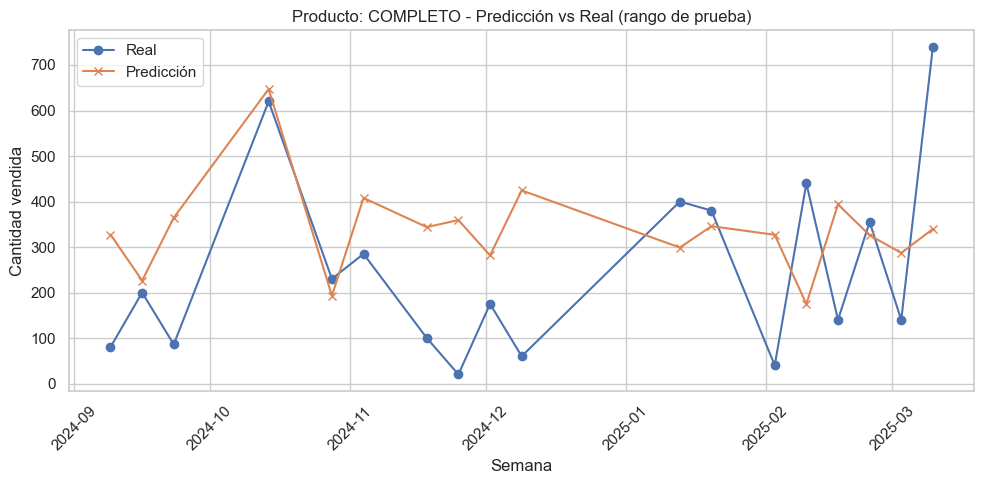

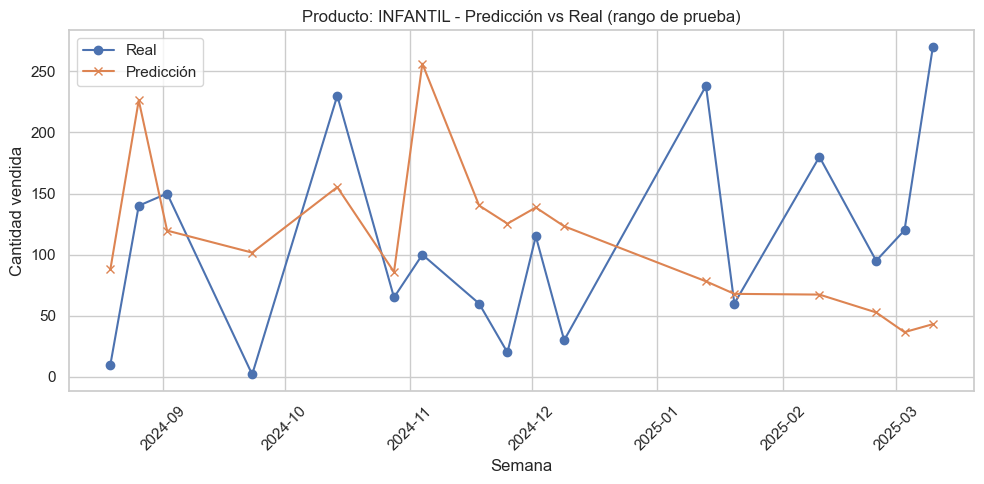

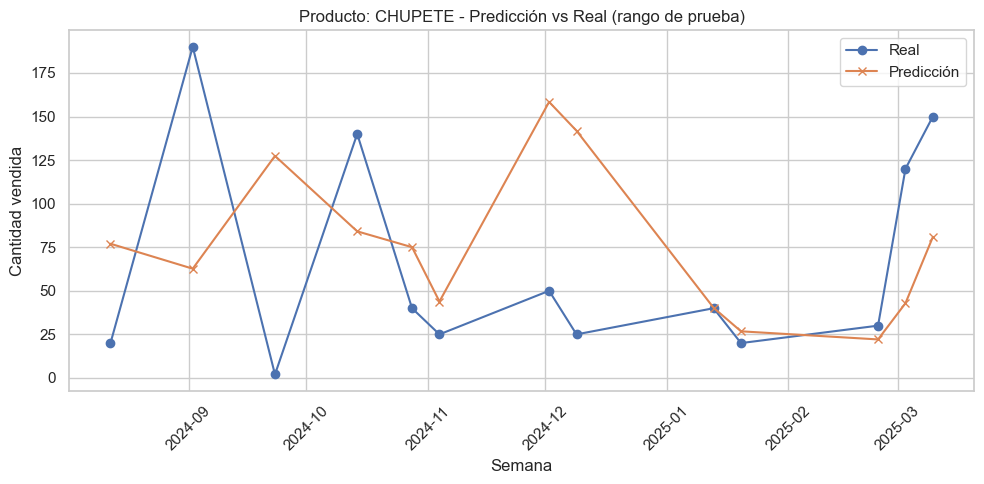

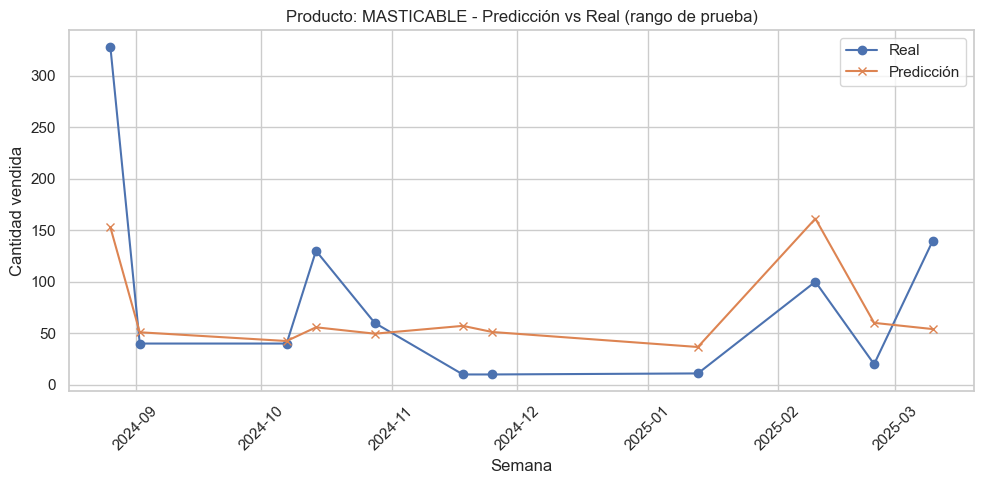

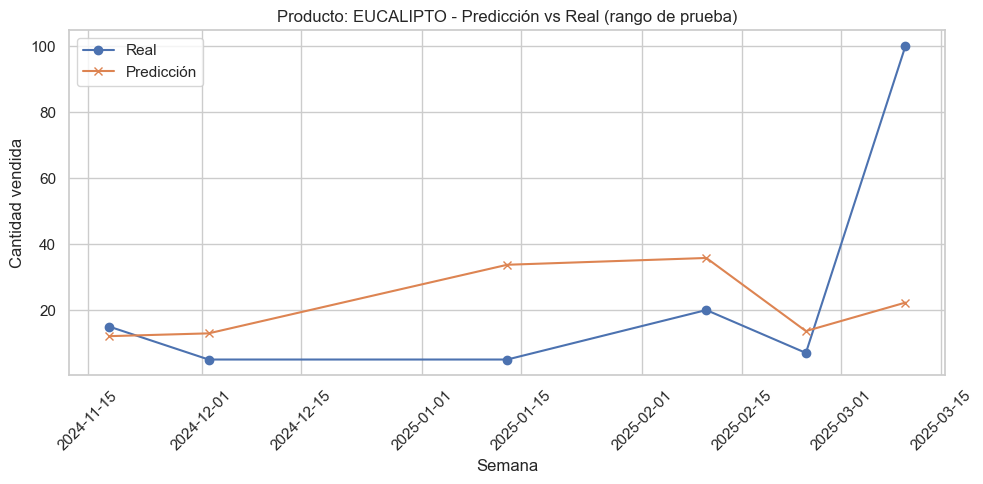

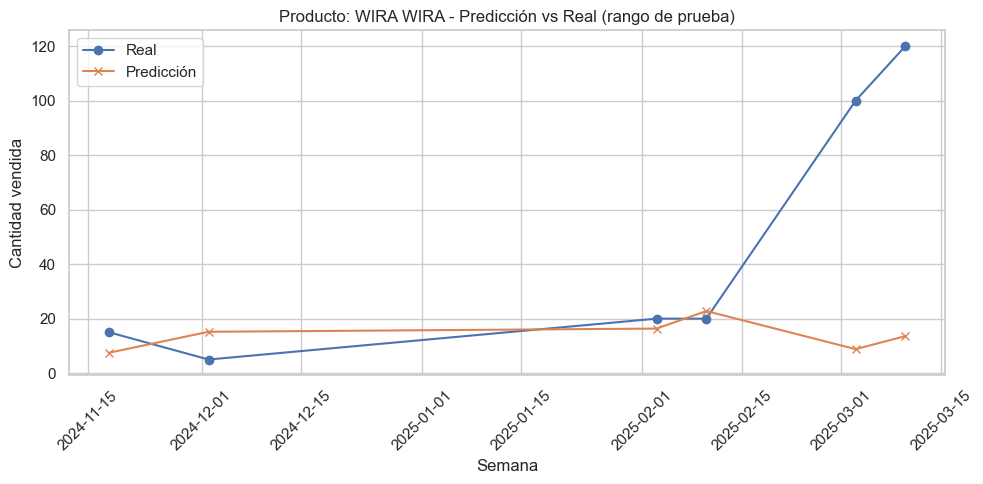

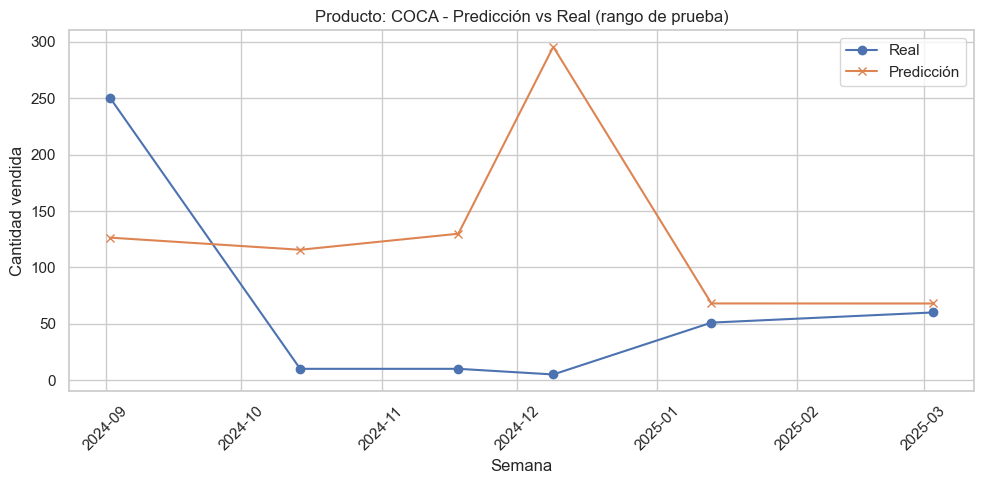

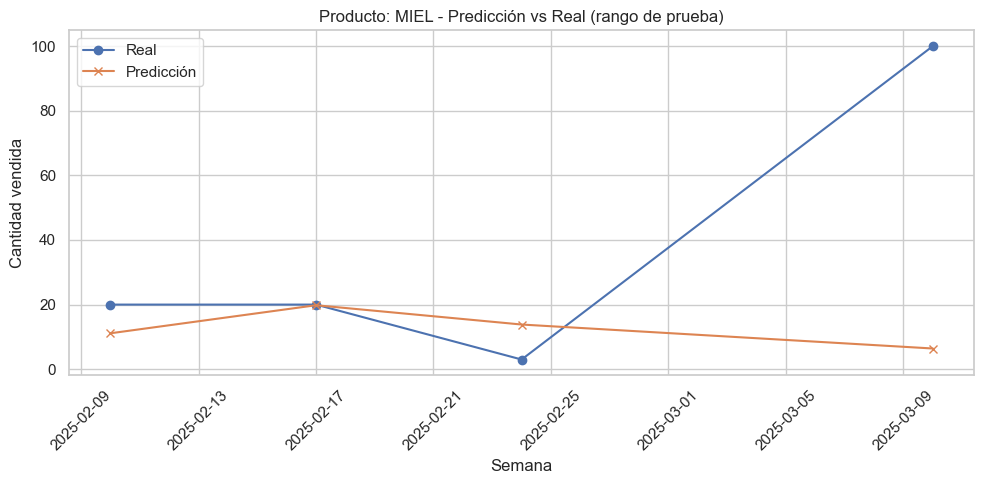

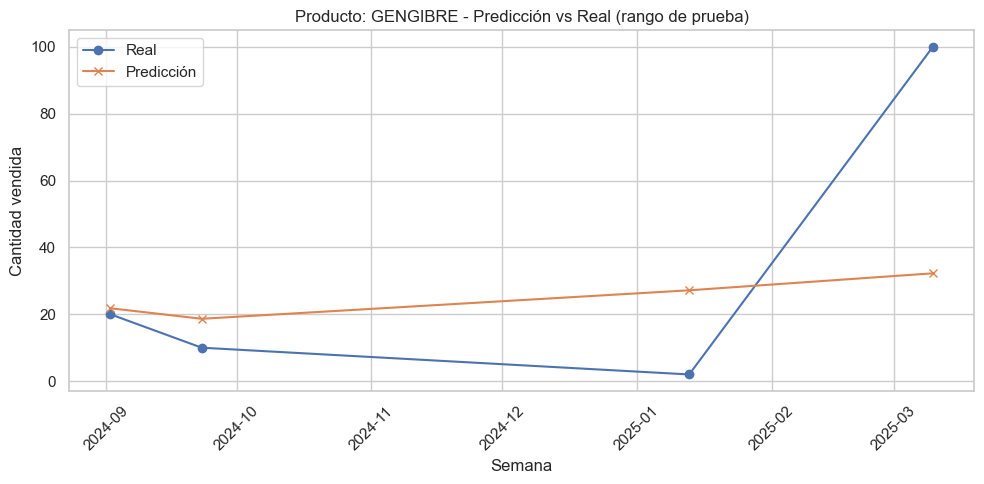

In [92]:
for producto in productos_validos:
    datos = resultados[producto]
    fechas = datos['fechas']
    y_test = datos['y_test']
    y_pred = datos['y_pred']

    plt.figure(figsize=(10, 5))
    plt.plot(fechas, y_test, label='Real', marker='o')
    plt.plot(fechas, y_pred, label='Predicción', marker='x')
    plt.title(f"Producto: {producto} - Predicción vs Real (rango de prueba)")
    plt.xlabel("Semana")
    plt.ylabel("Cantidad vendida")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

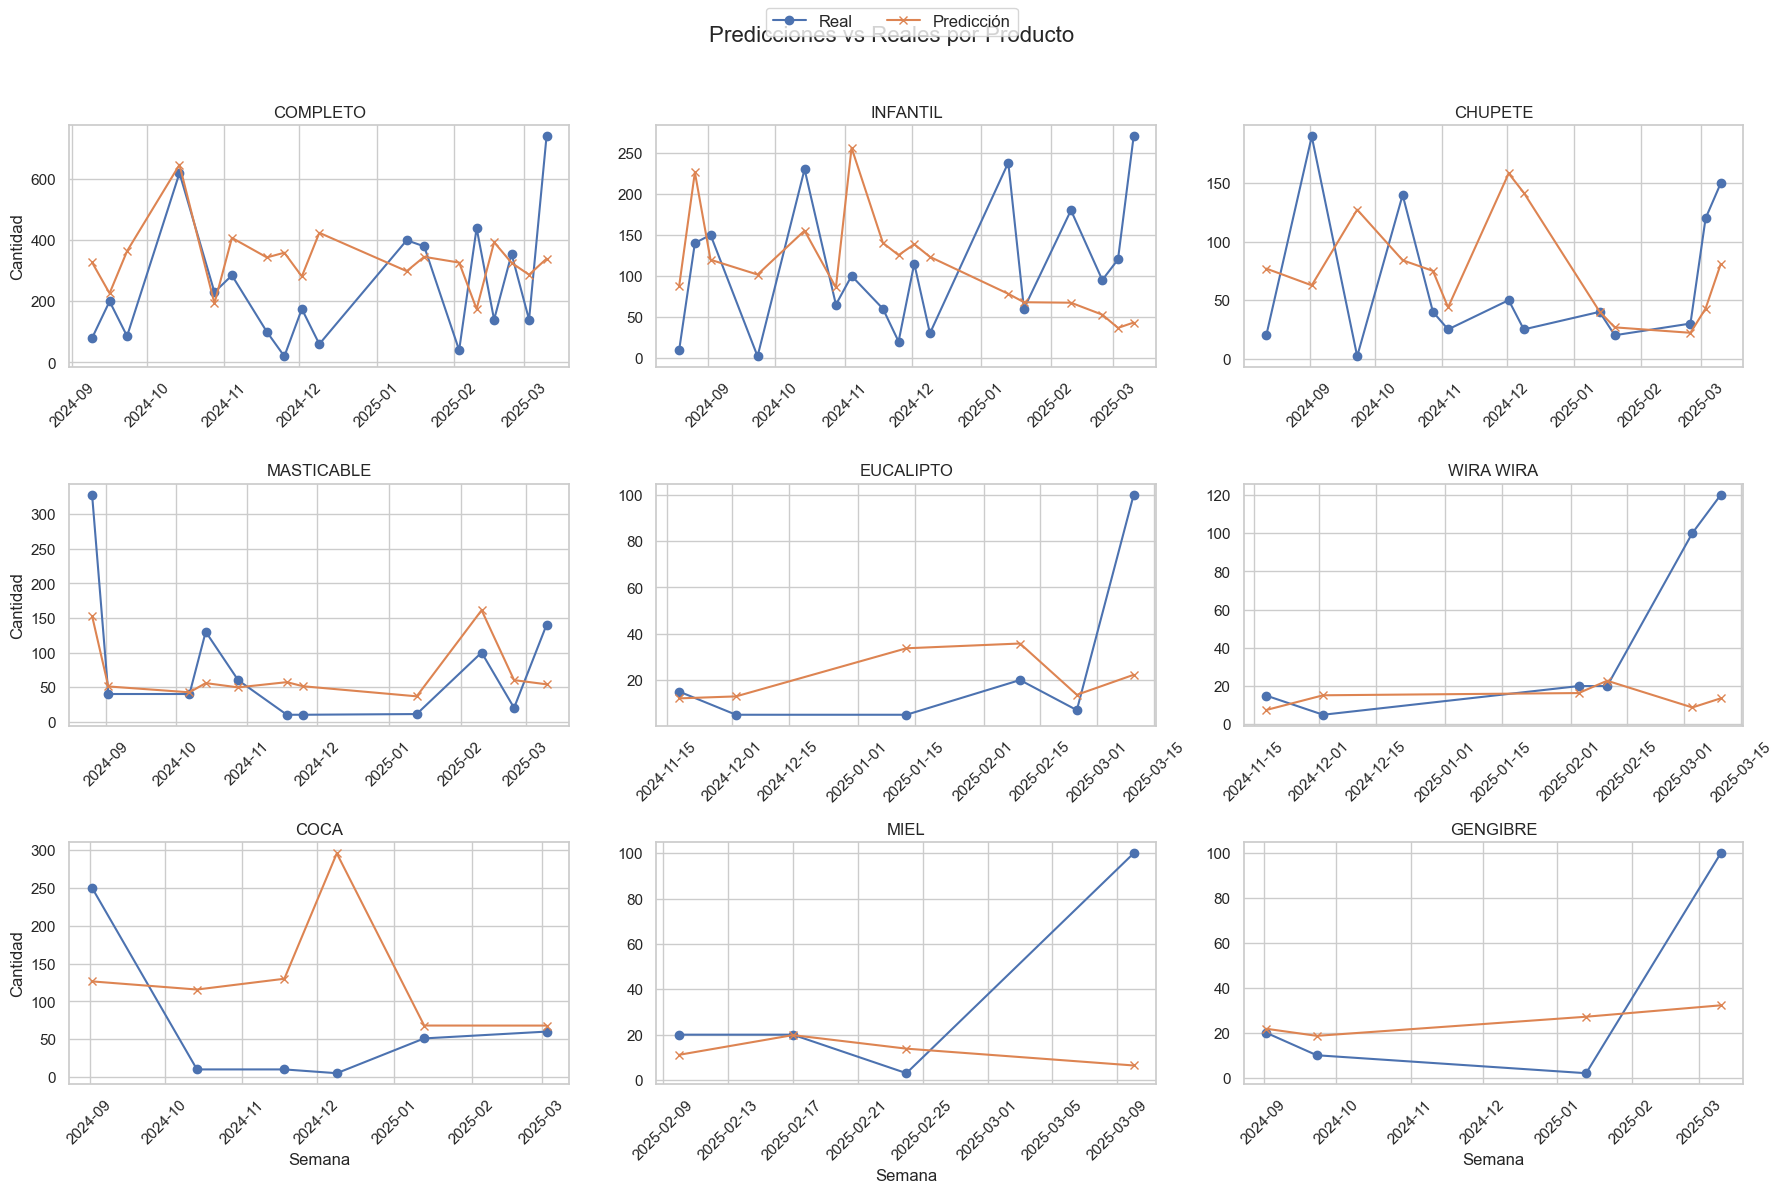

In [93]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))  # 3x3
fig.suptitle("Predicciones vs Reales por Producto", fontsize=16)

for idx, producto in enumerate(productos_validos):
    fila = idx // 3
    col = idx % 3
    ax = axes[fila, col]

    datos = resultados[producto]
    fechas = datos['fechas']
    y_test = datos['y_test']
    y_pred = datos['y_pred']

    ax.plot(fechas, y_test, label='Real', marker='o')
    ax.plot(fechas, y_pred, label='Predicción', marker='x')
    ax.set_title(producto)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

    if fila == 2:
        ax.set_xlabel("Semana")
    if col == 0:
        ax.set_ylabel("Cantidad")

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 4.5.5. Predicción a 4 semanas

In [94]:
import datetime

In [95]:
n_semanas_futuras = 4

In [96]:
predicciones_futuras = []

for producto in productos_validos:
    modelo = modelos[producto]
    df_producto = ventas_semanales[ventas_semanales['NOMBRE PRODUCTO'] == producto].copy()
    df_producto = df_producto.sort_values('SEMANA')
    
    ultima_fila = df_producto.iloc[-1]
    ultima_semana = ultima_fila['SEMANA']
    lag = ultima_fila['CANT']
    
    for i in range(n_semanas_futuras):
        nueva_semana = ultima_semana + pd.Timedelta(weeks=i+1)
        año = nueva_semana.year
        mes = nueva_semana.month
        
        precio = ultima_fila['PRECIO UNITARIO']
        ciudades_binarias = ultima_fila[[col for col in df_producto.columns if 'CIUDAD_' in col]]
        
        nueva_fila = pd.DataFrame([{
            'AÑO': año,
            'MES': mes,
            'PRECIO UNITARIO': precio,
            'CANT_LAG_1': lag,
            **ciudades_binarias
        }])
        
        pred = modelo.predict(nueva_fila)[0]
        
        predicciones_futuras.append({
            'PRODUCTO': producto,
            'SEMANA': nueva_semana,
            'PREDICCION': pred
        })
        
        lag = pred

In [97]:
df_futuro = pd.DataFrame(predicciones_futuras)
df_futuro.to_csv("Predicciones Ventas 4 Semanas.csv", index=False)

# 5. Segmentación de Clientes

## 5.1. K-Means

In [98]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode

In [99]:
clientes_df = ventas_df.groupby('NOMBRE CLIENTE').agg(
    total_compras=('CANT', 'sum'),
    total_gasto=('TOTAL', 'sum'),
    num_transacciones=('TOTAL', 'count'),
    ciudad=('CIUDAD', lambda x: x.mode().iloc[0] if not x.mode().empty else 'Desconocido')
).reset_index()

In [100]:
numerical_features = ['total_compras', 'total_gasto', 'num_transacciones']
scaler = StandardScaler()
clientes_df[numerical_features] = scaler.fit_transform(clientes_df[numerical_features])

In [101]:
clientes_df.head()

,NOMBRE CLIENTE,total_compras,total_gasto,num_transacciones,ciudad
0,ALEJANDRO CAMACHO,0.405541,0.454004,-0.066736,LA PAZ
1,ALEJANDRO LOZA,-0.422569,-0.425048,-0.428692,EL ALTO
2,ALEX,-0.494891,-0.492087,-0.428692,COCHABAMBA
3,ALEX SAN,-0.445756,-0.472948,-0.392496,COCHABAMBA
4,AMANDA ESPINOZA,-0.383924,-0.385021,-0.139127,COCHABAMBA


In [102]:
features_for_clustering = numerical_features + [col for col in clientes_df.columns if col.startswith('ciudad_')]

In [103]:
clientes_df = pd.get_dummies(clientes_df, columns=['ciudad'], prefix='ciudad')

In [104]:
clientes_df.head()

,NOMBRE CLIENTE,total_compras,total_gasto,num_transacciones,ciudad_COCHABAMBA,ciudad_EL ALTO,ciudad_LA PAZ,ciudad_ORURO,ciudad_POTOSI,ciudad_SANTA CRUZ,ciudad_SUCRE,ciudad_VILLAZON
0,ALEJANDRO CAMACHO,0.405541,0.454004,-0.066736,False,False,True,False,False,False,False,False
1,ALEJANDRO LOZA,-0.422569,-0.425048,-0.428692,False,True,False,False,False,False,False,False
2,ALEX,-0.494891,-0.492087,-0.428692,True,False,False,False,False,False,False,False
3,ALEX SAN,-0.445756,-0.472948,-0.392496,True,False,False,False,False,False,False,False
4,AMANDA ESPINOZA,-0.383924,-0.385021,-0.139127,True,False,False,False,False,False,False,False


In [105]:
kmeans_inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clientes_df[features_for_clustering])
    kmeans_inertia.append(kmeans.inertia_)


c:\Users\nando\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nando\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\nando\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\nando\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\nando\AppData\Local\Programs\Python\Python

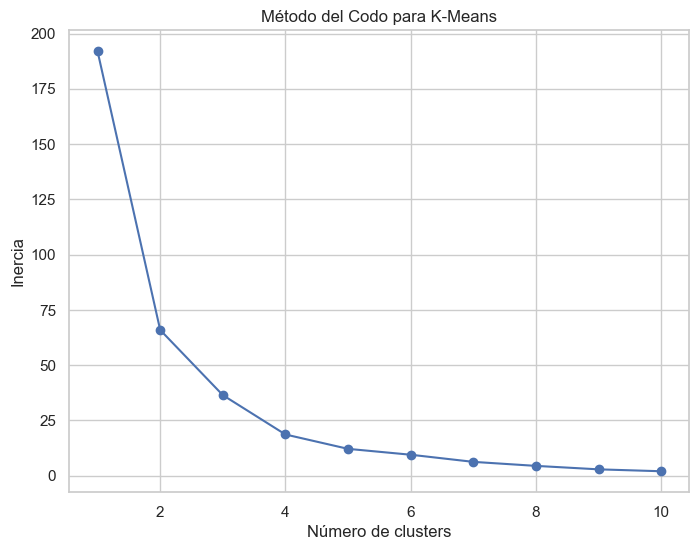

In [106]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), kmeans_inertia, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

In [107]:
kmeans = KMeans(n_clusters=3, random_state=42)
clientes_df['kmeans_cluster'] = kmeans.fit_predict(clientes_df[features_for_clustering])

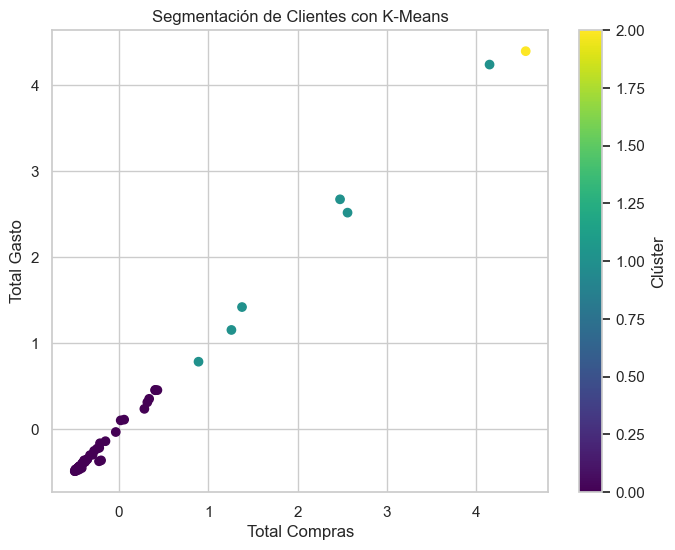

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(clientes_df['total_compras'], clientes_df['total_gasto'], c=clientes_df['kmeans_cluster'], cmap='viridis', marker='o')
plt.title('Segmentación de Clientes con K-Means')
plt.xlabel('Total Compras')
plt.ylabel('Total Gasto')

plt.colorbar(label='Clúster')

plt.show()

In [109]:
from sklearn.decomposition import PCA

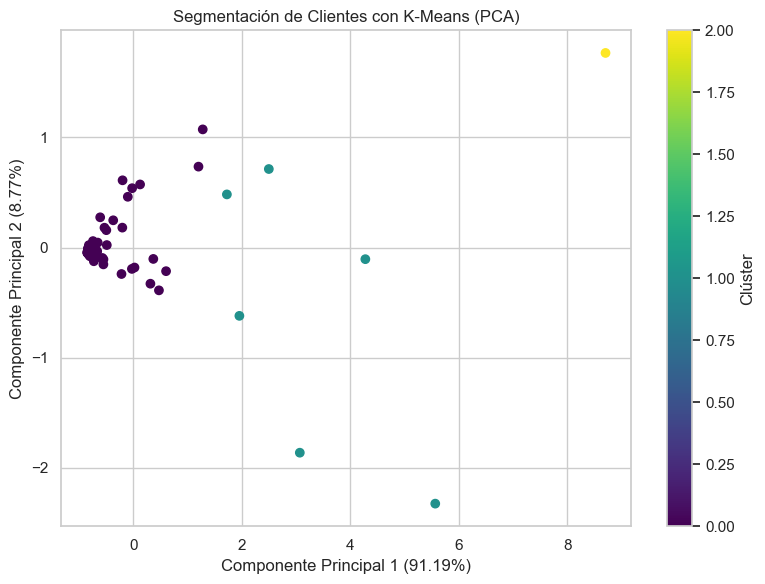

In [110]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(clientes_df[features_for_clustering])

clientes_df['PCA1'] = principal_components[:, 0]
clientes_df['PCA2'] = principal_components[:, 1]

explained_var = pca.explained_variance_ratio_ * 100

plt.figure(figsize=(8, 6))
scatter = plt.scatter(clientes_df['PCA1'], clientes_df['PCA2'], 
                      c=clientes_df['kmeans_cluster'], cmap='viridis', marker='o')

plt.title('Segmentación de Clientes con K-Means (PCA)')
plt.xlabel(f'Componente Principal 1 ({explained_var[0]:.2f}%)')
plt.ylabel(f'Componente Principal 2 ({explained_var[1]:.2f}%)')

plt.colorbar(scatter, label='Clúster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [111]:
clientes_df

,NOMBRE CLIENTE,total_compras,total_gasto,num_transacciones,ciudad_COCHABAMBA,ciudad_EL ALTO,ciudad_LA PAZ,ciudad_ORURO,ciudad_POTOSI,ciudad_SANTA CRUZ,ciudad_SUCRE,ciudad_VILLAZON,kmeans_cluster,PCA1,PCA2
0,ALEJANDRO CAMACHO,0.405541,0.454004,-0.066736,False,False,True,False,False,False,False,False,0,0.472724,-0.388431
1,ALEJANDRO LOZA,-0.422569,-0.425048,-0.428692,False,True,False,False,False,False,False,False,0,-0.736193,-0.031856
2,ALEX,-0.494891,-0.492087,-0.428692,True,False,False,False,False,False,False,False,0,-0.818757,0.021852
3,ALEX SAN,-0.445756,-0.472948,-0.392496,True,False,False,False,False,False,False,False,0,-0.758520,0.026288
4,AMANDA ESPINOZA,-0.383924,-0.385021,-0.139127,True,False,False,False,False,False,False,False,0,-0.531493,0.180289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,SRA DULCE,-0.324300,-0.305734,0.005656,True,False,False,False,False,False,False,False,0,-0.370172,0.247628
60,TORNERO,-0.389445,-0.372335,-0.392496,False,False,True,False,False,False,False,False,0,-0.665599,-0.034980
61,VASQUEZ CRISTIAN,-0.466735,-0.458950,-0.356300,True,False,False,False,False,False,False,False,0,-0.742928,0.058748
62,VICTOR FOREST,2.474712,2.672216,2.249783,True,False,False,False,False,False,False,False,1,4.277245,-0.105380


## 5.2. DBSCAN

In [112]:
clientes_df.columns

Index(['NOMBRE CLIENTE', 'total_compras', 'total_gasto', 'num_transacciones',
       'ciudad_COCHABAMBA', 'ciudad_EL ALTO', 'ciudad_LA PAZ', 'ciudad_ORURO',
       'ciudad_POTOSI', 'ciudad_SANTA CRUZ', 'ciudad_SUCRE', 'ciudad_VILLAZON',
       'kmeans_cluster', 'PCA1', 'PCA2'],
      dtype='object')

In [113]:
ciudades_dummies = clientes_df[['ciudad_COCHABAMBA', 'ciudad_EL ALTO', 'ciudad_LA PAZ', 'ciudad_ORURO',
       'ciudad_POTOSI', 'ciudad_SANTA CRUZ', 'ciudad_SUCRE',
       'ciudad_VILLAZON',]]

In [114]:
features_for_dbscan = numerical_features + [col for col in clientes_df.columns if col.startswith('ciudad_')]

In [115]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clientes_df['dbscan_cluster'] = dbscan.fit_predict(clientes_df[features_for_dbscan])

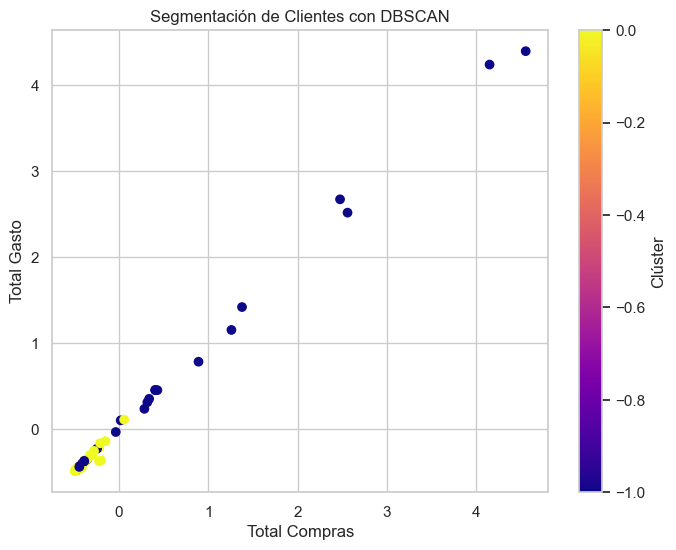

In [116]:
plt.figure(figsize=(8, 6))
plt.scatter(clientes_df['total_compras'], clientes_df['total_gasto'], c=clientes_df['dbscan_cluster'], cmap='plasma', marker='o')

plt.title('Segmentación de Clientes con DBSCAN')
plt.xlabel('Total Compras')
plt.ylabel('Total Gasto')
plt.colorbar(label='Clúster')

plt.show()

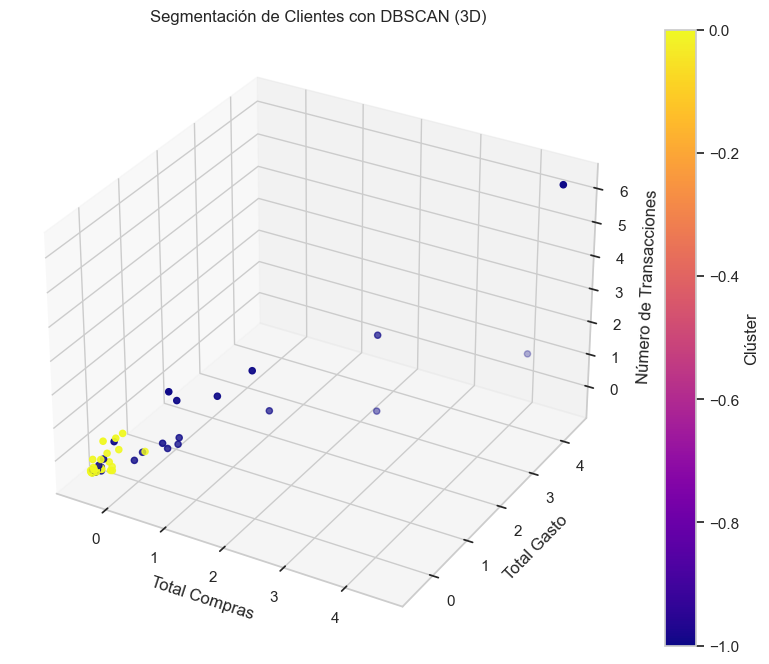

In [117]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = clientes_df['total_compras']
y = clientes_df['total_gasto']
z = clientes_df['num_transacciones']

scatter = ax.scatter(x, y, z, c=clientes_df['dbscan_cluster'], cmap='plasma', marker='o')

ax.set_title('Segmentación de Clientes con DBSCAN (3D)')
ax.set_xlabel('Total Compras')
ax.set_ylabel('Total Gasto')
ax.set_zlabel('Número de Transacciones')

fig.colorbar(scatter, ax=ax, label='Clúster')

plt.show()

In [118]:
from sklearn.metrics import silhouette_score

In [119]:
silhouette_dbscan = silhouette_score(clientes_df[features_for_dbscan], clientes_df['dbscan_cluster'])

In [120]:
print(f"Inercia K-Means: {kmeans.inertia_}")

Inercia K-Means: 36.4417720559982


In [121]:
print(f"Silhouette Score DBSCAN: {silhouette_dbscan:.3f}")

Silhouette Score DBSCAN: 0.376


In [122]:
print(f"Número de Clústeres únicos en DBSCAN: {len(np.unique(clientes_df['dbscan_cluster']))}")

Número de Clústeres únicos en DBSCAN: 2


### 5.3. Reducción de Dimensiones

In [123]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(clientes_df[features_for_dbscan])
clientes_df['PCA1'] = principal_components[:, 0]
clientes_df['PCA2'] = principal_components[:, 1]

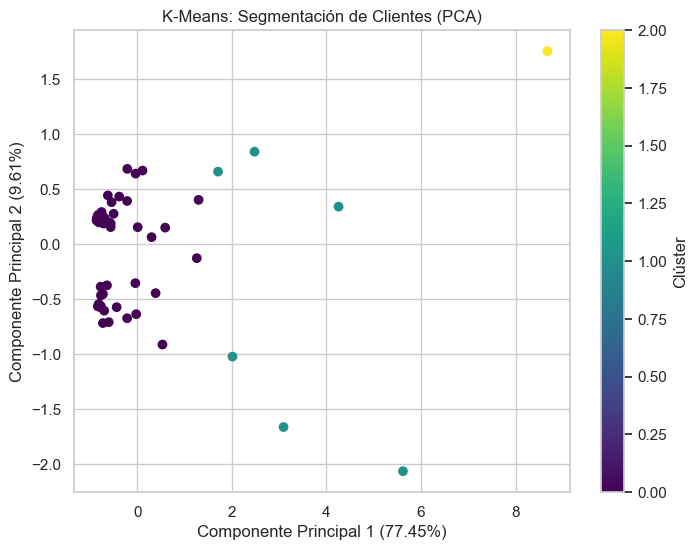

In [124]:
plt.figure(figsize=(8, 6))
plt.scatter(clientes_df['PCA1'], clientes_df['PCA2'], c=clientes_df['kmeans_cluster'], cmap='viridis')
plt.title('K-Means: Segmentación de Clientes (PCA)')
plt.xlabel(f'Componente Principal 1 ({round(pca.explained_variance_ratio_[0]*100, 2)}%)')
plt.ylabel(f'Componente Principal 2 ({round(pca.explained_variance_ratio_[1]*100, 2)}%)')
plt.colorbar(label='Clúster')
plt.show()

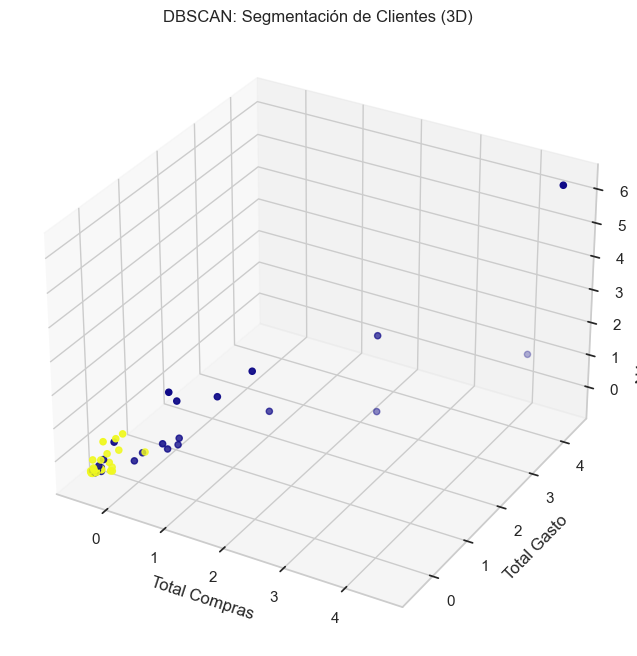

In [125]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    clientes_df['total_compras'],
    clientes_df['total_gasto'],
    clientes_df['num_transacciones'],
    c=clientes_df['dbscan_cluster'],
    cmap='plasma'
)
ax.set_title('DBSCAN: Segmentación de Clientes (3D)')
ax.set_xlabel('Total Compras')
ax.set_ylabel('Total Gasto')
ax.set_zlabel('Número de Transacciones')
plt.show()

In [141]:
variables_escaladas = ['total_compras', 'total_gasto', 'num_transacciones']

clientes_df[variables_escaladas] = scaler.inverse_transform(clientes_df[variables_escaladas])

In [142]:
clientes_df

,NOMBRE CLIENTE,total_compras,total_gasto,num_transacciones,ciudad_COCHABAMBA,ciudad_EL ALTO,ciudad_LA PAZ,ciudad_ORURO,ciudad_POTOSI,ciudad_SANTA CRUZ,ciudad_SUCRE,ciudad_VILLAZON,kmeans_cluster,PCA1,PCA2,dbscan_cluster
0,ALEJANDRO CAMACHO,1640.0,86960.0,13.0,False,False,True,False,False,False,False,False,0,0.531162,-0.911333,-1
1,ALEJANDRO LOZA,140.0,6580.0,3.0,False,True,False,False,False,False,False,False,0,-0.728120,-0.453267,-1
2,ALEX,9.0,450.0,3.0,True,False,False,False,False,False,False,False,0,-0.832325,0.265334,0
3,ALEX SAN,98.0,2200.0,4.0,True,False,False,False,False,False,False,False,0,-0.772192,0.270400,0
4,AMANDA ESPINOZA,210.0,10240.0,11.0,True,False,False,False,False,False,False,False,0,-0.545730,0.381918,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,SRA DULCE,318.0,17490.0,15.0,True,False,False,False,False,False,False,False,0,-0.384756,0.432628,0
60,TORNERO,200.0,11400.0,4.0,False,False,True,False,False,False,False,False,0,-0.605801,-0.708030,-1
61,VASQUEZ CRISTIAN,60.0,3480.0,5.0,True,False,False,False,False,False,False,False,0,-0.756666,0.292744,0
62,VICTOR FOREST,5388.0,289792.0,77.0,True,False,False,False,False,False,False,False,1,4.255676,0.341157,-1


In [143]:
clientes_df.to_csv('SEGEMENTACION CLIENTES.csv', index=False)

# 6. Optimización de Inventarios

### 6.1. Optimización de Inventarios con Programación Lineal

In [127]:
import pulp
import pandas as pd

### 6.1.1. Carga y Predicción de Demanda

In [128]:
ventas_historicas = {
    'COMPLETO': 29849,
    'INFANTIL': 10624,
    'COCA': 6417,
    'CHUPETE': 5816,
    'MASTICABLE': 3104,
    'EUCALIPTO': 777,
    'WIRA WIRA': 594,
    'GENGIBRE': 425,
    'MIEL': 341
}

In [129]:
predicciones_lista = []
for producto, datos in resultados.items():
    fechas = datos['fechas']
    predicciones = datos['y_pred']
    reales = datos['y_test']
    
    temp_df = pd.DataFrame({
        'Producto': producto,
        'Fecha': fechas,
        'Prediccion': predicciones,
        'Real': reales
    })
    predicciones_lista.append(temp_df)

demanda_predicha_df = pd.concat(predicciones_lista, ignore_index=True)
demanda_predicha = demanda_predicha_df.groupby('Producto')['Prediccion'].mean()

### 6.1.2. Clasificación de Productos por Rotación

In [130]:
ventas_promedio_semanal = {producto: ventas / 109 for producto, ventas in ventas_historicas.items()}

clasificacion_rotacion = {}
for producto, promedio in ventas_promedio_semanal.items():
    if promedio > 10:
        clasificacion_rotacion[producto] = 'alta'
    elif promedio > 5:
        clasificacion_rotacion[producto] = 'media'
    else:
        clasificacion_rotacion[producto] = 'baja'

### 6.1.3. Factores de Seguridad

In [131]:
factores_seguridad = {
    'alta': None,
    'media': 1.7,
    'baja': 1.5
}

### 6.1.4. Ajuste de Costos de Almacenamiento

In [132]:
costos_almacenamiento = {
    'COMPLETO': 2,
    'INFANTIL': 1.8,
    'CHUPETE': 1.5,
    'MASTICABLE': 1.2,
    'EUCALIPTO': 1.0,
    'COCA': 0.8,
    'WIRA WIRA': 0.7,
    'MIEL': 0.6,
    'GENGIBRE': 0.5
}

costos_faltante = {producto: 5 for producto in demanda_predicha.index}
costos_pedido = {producto: 20 for producto in demanda_predicha.index}

### 6.1.4. Conversión de Demanda a Demanda Semanal

In [133]:
demanda_predicha_semanal = demanda_predicha

### 6.1.6. Ajustar Demanda Segun Rotación

In [134]:
demanda_ajustada = {}

for producto in demanda_predicha.index:
    prediccion = demanda_predicha[producto]
    rotacion = clasificacion_rotacion.get(producto, 'baja')

    if prediccion <= 0:
        demanda_ajustada[producto] = 5
    elif rotacion == 'baja':
        demanda_ajustada[producto] = max(prediccion * 0.2, 5)
    else:
        demanda_ajustada[producto] = prediccion

### 6.1.5. Optimización Lineal

In [135]:
modelo = pulp.LpProblem("Optimización_de_Inventarios_Semanal", pulp.LpMinimize)

cantidad_a_pedir = {
    producto: pulp.LpVariable(f"Cantidad_{producto}", lowBound=0, cat='Continuous')
    for producto in demanda_ajustada.keys()
}

faltante_producto = {
    producto: pulp.LpVariable(f"Faltante_{producto}", lowBound=0, cat='Continuous')
    for producto in demanda_ajustada.keys()
}

modelo += pulp.lpSum([
    costos_almacenamiento[producto] * cantidad_a_pedir[producto] +
    costos_pedido[producto] * cantidad_a_pedir[producto] +
    costos_faltante[producto] * faltante_producto[producto]
    for producto in demanda_ajustada.keys()
])

for producto in demanda_ajustada.keys():
    modelo += cantidad_a_pedir[producto] >= demanda_ajustada[producto]
    modelo += faltante_producto[producto] >= demanda_ajustada[producto] - cantidad_a_pedir[producto]

modelo.solve()

1

In [136]:
resultados_finales = {}
for producto in demanda_ajustada.keys():
    resultados_finales[producto] = {
        'Cantidad a pedir (semanal)': round(cantidad_a_pedir[producto].varValue, 2),
        'Faltante estimado': round(faltante_producto[producto].varValue, 2),
        'Demanda ajustada': round(demanda_ajustada[producto], 2),
        'Rotación': clasificacion_rotacion[producto]
    }


In [137]:
resultados_finales_df = pd.DataFrame.from_dict(resultados_finales, orient='index')
resultados_finales_df.reset_index(inplace=True)
resultados_finales_df.rename(columns={'index': 'Producto'}, inplace=True)
resultados_finales_df.to_csv('OPTIMIZACION INVENTARIO.csv', index=False)

In [138]:
print("Resultados de optimización de inventarios:\n")
print(resultados_finales_df)


Resultados de optimización de inventarios:

     Producto  Cantidad a pedir (semanal)  Faltante estimado  \
0     CHUPETE                       75.63                0.0   
1        COCA                      133.93                0.0   
2    COMPLETO                      337.11                0.0   
3   EUCALIPTO                       21.73                0.0   
4    GENGIBRE                        5.00                0.0   
5    INFANTIL                      112.12                0.0   
6  MASTICABLE                       70.17                0.0   
7        MIEL                        5.00                0.0   
8   WIRA WIRA                       14.04                0.0   

   Demanda ajustada Rotación  
0             75.63     alta  
1            133.93     alta  
2            337.11     alta  
3             21.73    media  
4              5.00     baja  
5            112.12     alta  
6             70.17     alta  
7              5.00     baja  
8             14.04    media  


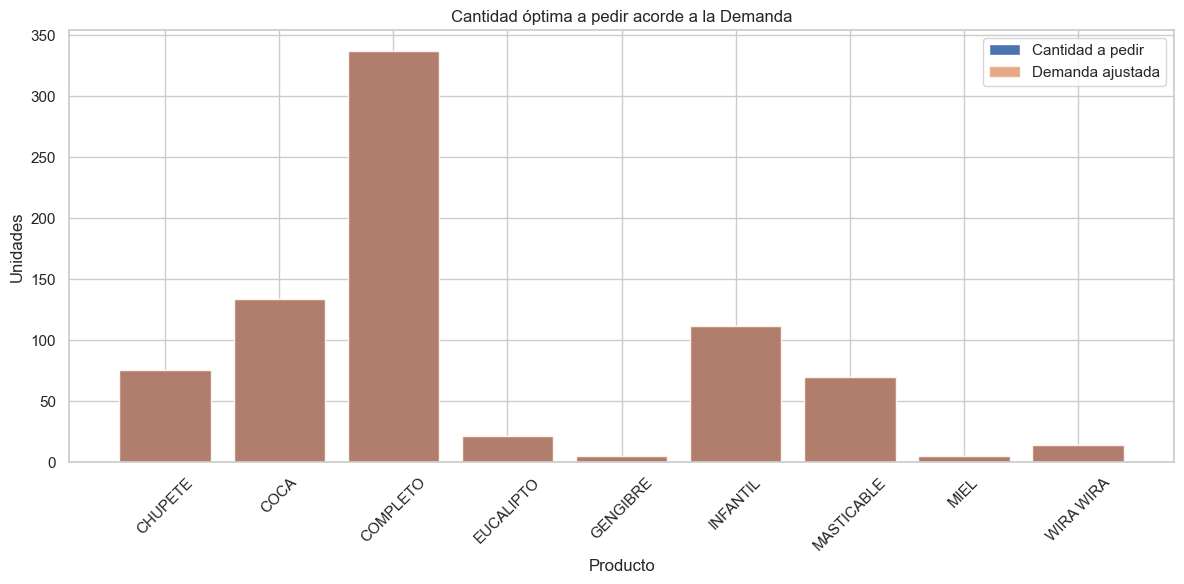

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
x = resultados_finales_df['Producto']
plt.bar(x, resultados_finales_df['Cantidad a pedir (semanal)'], label='Cantidad a pedir')
plt.bar(x, resultados_finales_df['Demanda ajustada'], alpha=0.7, label='Demanda ajustada')

plt.xlabel('Producto')
plt.ylabel('Unidades')
plt.title('Cantidad óptima a pedir acorde a la Demanda')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [140]:
print("Costo total estimado:", pulp.value(modelo.objective))

Costo total estimado: 16712.3736244
